## Data Exploratory Analysis (EDA)

The exploratory data analysis process focuses on understanding and preparing the flight delay dataset for further analysis. First, the dataset is inspected for completeness, with missing values identified and addressed through imputation or removal. Key variables, such as departure time, weather conditions, and day-of-week, are analyzed using descriptive statistics to uncover distributions and trends. Relationships between delays and external factors, including weather and holidays, are visualized using scatterplots and bar charts. Outliers and anomalies are flagged and investigated to ensure data consistency. Finally, insights from the analysis guide feature engineering and refined hypotheses for predictive modeling.

### Variables

The flight delay dataset is composed by the following variables:
#### Flight specific variables
- day_of_week: day of the week (1 = Monday, 7 = Sunday)
- date: flight date (DD/MM/YYYY format)
- dep_time: actual departure time (HHMM, 24h format)
- arr_time: actual arrival time (HHMM, 24h format)
- crs_arr_time: scheduled arrival time (HHMM, 24h hormat)
- unique_carrier: airline code representing the operating carrier
- airline: full name of the airline
- flight_num: flight identification number
- tail_num: unique identifier for the aircraft
- actual_elapsed_time: actual flight duration (min)
- crs_elapsed_time: scheduled flight duration (min)
- air_time: time spent in the air (min)
- arr_delay: arrival delay (min)
- dep-delay: departure delay (min)

#### Airport and location variables
- origin: IATA code of the origin airport
- org_airport: full name of the origin airport
- dest: IATA code of the destination airport
- dest_airport: full name of the destination airport
- distance: distance of the flight (miles)

#### Operational variables
- taxi_in: time spent taxiing after landing (min)
- taxi_out: time spent taxiing befor takeoff (min)
- cancelled: binary indicator if the flight was cancelled (1 = YES, 0 = NO)
- cancellation_code: reason for the cancellation
- diverted: binary indicator for flight diversion (1 = YES, 0 = NO)

#### Delay causes
- carrier_delay: delay caused by the airline (min)
- weather_delay: delay caused by weather conditions (min)
- nas_delay: delay caused by the National Airspace System (min)
- security_delay: delay caused by security-related issues (min)
- late_aircraft_delay: delay caused by the late arrival of the aircraft (min)

#### Weather information
- oaci_org_airport: OACI code of the origin airport
- wmo: WMO (World Meteorological Organization) station code
- tavg: average temperature (Celsius degrees)
- tmin: minimum temperature (Celsius degrees)
- tmax: maximum temperature (Celsius degrees)
- prcp: total precipitation (mm)
- snow: snowfall (mm)
- wdir: wind direction (degress)
- wspd: average wind speed (km/h)
- wpgt: wind gust (km/h)
- pres: atospheric pressure (hPa)
- tsun: sunshine duration (hours)

#### Holiday information
- is_holiday: binary indicator if the flight date is a public holiday (1 = YES, 0 = NO)

### Imports

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# from skrub import DatetimeEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import ttest_ind, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import levene
from scipy.stats import kruskal
from scikit_posthocs import posthoc_dunn

### Initial Data Inspection
Understand the dataset's structure and size

In [2]:
# load the dataset
flight_delay = pd.read_csv('flight_delay_with_meteo_holidays.csv', low_memory = True, delimiter = ';')

In [3]:
# basic info
print("Dataset overview:")
print(flight_delay.info())
print(f"\nDataset shape: {flight_delay.shape}")

Dataset overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484551 entries, 0 to 484550
Data columns (total 43 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   day_of_week          484551 non-null  int64  
 1   date                 484551 non-null  object 
 2   dep_time             484551 non-null  int64  
 3   arr_time             484551 non-null  int64  
 4   crs_arr_time         484551 non-null  int64  
 5   unique_carrier       484551 non-null  object 
 6   airline              484551 non-null  object 
 7   flight_num           484551 non-null  int64  
 8   tail_num             484551 non-null  object 
 9   actual_elapsed_time  484551 non-null  int64  
 10  crs_elapsed_time     484551 non-null  int64  
 11  air_time             484551 non-null  int64  
 12  arr_delay            484551 non-null  int64  
 13  dep_delay            484551 non-null  int64  
 14  origin               484551 non-null  object 
 15 

In [4]:
print("\nFirst 5 rows:")
display(flight_delay.head())


First 5 rows:


,day_of_week,date,dep_time,arr_time,crs_arr_time,unique_carrier,airline,flight_num,tail_num,actual_elapsed_time,...,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,is_holiday,tomorrow_is_holiday
0,4,03/01/2019,1829,1959,1925,WN,Southwest Airlines Co.,3920,N464WN,90,...,5.6,0.0,0.0,233.0,11.9,NaN,1019.4,NaN,0,0
1,4,03/01/2019,1937,2037,1940,WN,Southwest Airlines Co.,509,N763SW,240,...,5.6,0.0,0.0,233.0,11.9,NaN,1019.4,NaN,0,0
2,4,03/01/2019,1644,1845,1725,WN,Southwest Airlines Co.,1333,N334SW,121,...,5.6,0.0,0.0,233.0,11.9,NaN,1019.4,NaN,0,0
3,4,03/01/2019,1452,1640,1625,WN,Southwest Airlines Co.,675,N286WN,228,...,5.6,0.0,0.0,233.0,11.9,NaN,1019.4,NaN,0,0
4,4,03/01/2019,1323,1526,1510,WN,Southwest Airlines Co.,4,N674AA,123,...,5.6,0.0,0.0,233.0,11.9,NaN,1019.4,NaN,0,0


In [5]:
# summary statistics
print("\nDescriptive statistics:")
display(flight_delay.describe())


Descriptive statistics:


,day_of_week,dep_time,arr_time,crs_arr_time,flight_num,actual_elapsed_time,crs_elapsed_time,air_time,arr_delay,dep_delay,...,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,is_holiday,tomorrow_is_holiday
count,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,...,484091.000000,478003.000000,463433.000000,450450.000000,482910.000000,0.0,470250.000000,1130.000000,484551.000000,484551.000000
mean,3.991605,1564.477865,1617.784438,1652.129929,2139.207386,134.810422,131.400761,108.877134,60.907764,57.498086,...,17.655660,2.828357,7.454823,184.132434,14.503144,NaN,1016.625081,259.761947,0.054108,0.054108
std,1.971466,452.235219,583.637660,466.096216,1812.677071,74.070374,71.542531,70.113513,56.975420,55.991012,...,10.704751,7.744164,37.123781,97.452732,6.327547,NaN,6.893789,291.290919,0.226231,0.226231
min,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,-21.000000,0.000000,15.000000,6.000000,...,-35.000000,0.000000,0.000000,0.000000,0.000000,NaN,972.900000,0.000000,0.000000,0.000000
25%,2.000000,1234.000000,1327.000000,1339.000000,629.000000,80.000000,79.000000,57.000000,25.000000,23.000000,...,10.600000,0.000000,0.000000,106.000000,9.700000,NaN,1012.000000,0.000000,0.000000,0.000000
50%,4.000000,1620.000000,1737.000000,1723.000000,1514.000000,116.000000,114.000000,90.000000,42.000000,40.000000,...,18.900000,0.000000,0.000000,186.000000,13.700000,NaN,1016.400000,146.000000,0.000000,0.000000
75%,6.000000,1928.000000,2049.000000,2025.000000,3683.000000,168.000000,162.000000,139.000000,76.000000,72.000000,...,26.100000,1.300000,0.000000,264.000000,18.300000,NaN,1021.100000,513.000000,0.000000,0.000000
max,7.000000,2400.000000,2400.000000,2359.000000,8403.000000,727.000000,602.000000,609.000000,1707.000000,1710.000000,...,44.400000,156.000000,710.000000,360.000000,59.000000,NaN,1045.400000,908.000000,1.000000,1.000000


In [6]:
# duplicate rows
duplicates = flight_delay.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")


Duplicate rows: 2


In [7]:
# review of missing values
missing_report = flight_delay.isnull().sum() / len(flight_delay) * 100

print("\nPercentage of missing values:")
print(missing_report.sort_values(ascending=False))


Percentage of missing values:
wpgt                   100.000000
tsun                    99.766794
wdir                     7.037649
snow                     4.358262
pres                     2.951392
prcp                     1.351354
wspd                     0.338664
tavg                     0.306676
dest_airport             0.305231
org_airport              0.242905
tmax                     0.094933
tmin                     0.094727
late_aircraft_delay      0.000000
weather_delay            0.000000
nas_delay                0.000000
security_delay           0.000000
day_of_week              0.000000
oaci_org_airport         0.000000
wmo                      0.000000
diverted                 0.000000
is_holiday               0.000000
carrier_delay            0.000000
cancelled                0.000000
cancellation_code        0.000000
date                     0.000000
dep_time                 0.000000
arr_time                 0.000000
crs_arr_time             0.000000
unique_carrier   

### Data Cleaning
Handle missing values and remove/process redundant columns

In [8]:
# remove duplicates
flight_delay.drop_duplicates(inplace=True)

In [9]:
# convert date column to datetime format
flight_delay['date'] = pd.to_datetime(flight_delay['date'], dayfirst=True)

In [10]:
# extract year, month, day
flight_delay['year'] = flight_delay['date'].dt.year
flight_delay['month'] = flight_delay['date'].dt.month
flight_delay['day'] = flight_delay['date'].dt.day

# reorganize columns
columns_order = ['year', 'month', 'day'] + [col for col in flight_delay.columns if col not in ['year', 'month', 'day']]
flight_delay = flight_delay[columns_order]

print(flight_delay.head())

   year  month  day  day_of_week       date  dep_time  arr_time  crs_arr_time  \
0  2019      1    3            4 2019-01-03      1829      1959          1925   
1  2019      1    3            4 2019-01-03      1937      2037          1940   
2  2019      1    3            4 2019-01-03      1644      1845          1725   
3  2019      1    3            4 2019-01-03      1452      1640          1625   
4  2019      1    3            4 2019-01-03      1323      1526          1510   

  unique_carrier                 airline  ...  tmax prcp  snow   wdir  wspd  \
0             WN  Southwest Airlines Co.  ...   5.6  0.0   0.0  233.0  11.9   
1             WN  Southwest Airlines Co.  ...   5.6  0.0   0.0  233.0  11.9   
2             WN  Southwest Airlines Co.  ...   5.6  0.0   0.0  233.0  11.9   
3             WN  Southwest Airlines Co.  ...   5.6  0.0   0.0  233.0  11.9   
4             WN  Southwest Airlines Co.  ...   5.6  0.0   0.0  233.0  11.9   

   wpgt    pres tsun is_holiday tomorr

In [11]:
# drop redundant or uninformative columns
columns_to_drop = ['date', 'tsun', 'flight_num', 'tail_num', 'cancellation_code', 'org_airport', 'dest_airport', 'wpgt', 'carrier_delay',  'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'airline', 'oaci_org_airport', 'wmo', 'cancelled', 'diverted']

# drop columns
flight_delay.drop(columns=columns_to_drop, inplace=True)
flight_delay.head()

,year,month,day,day_of_week,dep_time,arr_time,crs_arr_time,unique_carrier,actual_elapsed_time,crs_elapsed_time,...,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres,is_holiday,tomorrow_is_holiday
0,2019,1,3,4,1829,1959,1925,WN,90,90,...,0.5,-3.2,5.6,0.0,0.0,233.0,11.9,1019.4,0,0
1,2019,1,3,4,1937,2037,1940,WN,240,250,...,0.5,-3.2,5.6,0.0,0.0,233.0,11.9,1019.4,0,0
2,2019,1,3,4,1644,1845,1725,WN,121,135,...,0.5,-3.2,5.6,0.0,0.0,233.0,11.9,1019.4,0,0
3,2019,1,3,4,1452,1640,1625,WN,228,240,...,0.5,-3.2,5.6,0.0,0.0,233.0,11.9,1019.4,0,0
4,2019,1,3,4,1323,1526,1510,WN,123,135,...,0.5,-3.2,5.6,0.0,0.0,233.0,11.9,1019.4,0,0


In [12]:
# impute missing values
numerical_cols_to_impute = ['distance', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'pres']
for col in numerical_cols_to_impute:
    if col in flight_delay.columns:
        flight_delay[col].fillna(flight_delay[col].median(), inplace=True)

<ipython-input-12-dd2d7586a2eb>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  flight_delay[col].fillna(flight_delay[col].median(), inplace=True)


In [13]:
# handle missing values: fill missing values for critical numerical columns with median
numerical_cols_to_impute = ['distance', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'pres']
for col in numerical_cols_to_impute:
    if col in flight_delay.columns:
        flight_delay[col].fillna(flight_delay[col].median(), inplace=True)

flight_delay.head()

<ipython-input-13-59944098c945>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  flight_delay[col].fillna(flight_delay[col].median(), inplace=True)


,year,month,day,day_of_week,dep_time,arr_time,crs_arr_time,unique_carrier,actual_elapsed_time,crs_elapsed_time,...,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres,is_holiday,tomorrow_is_holiday
0,2019,1,3,4,1829,1959,1925,WN,90,90,...,0.5,-3.2,5.6,0.0,0.0,233.0,11.9,1019.4,0,0
1,2019,1,3,4,1937,2037,1940,WN,240,250,...,0.5,-3.2,5.6,0.0,0.0,233.0,11.9,1019.4,0,0
2,2019,1,3,4,1644,1845,1725,WN,121,135,...,0.5,-3.2,5.6,0.0,0.0,233.0,11.9,1019.4,0,0
3,2019,1,3,4,1452,1640,1625,WN,228,240,...,0.5,-3.2,5.6,0.0,0.0,233.0,11.9,1019.4,0,0
4,2019,1,3,4,1323,1526,1510,WN,123,135,...,0.5,-3.2,5.6,0.0,0.0,233.0,11.9,1019.4,0,0


### Exploratory statistics
Statictics and visualizations to get an overview of variable distributions and relationships

In [14]:
# correlation matrix with only numeric data
numeric_data = flight_delay.select_dtypes(include=['number'])

# remove uninformative variables
columns_to_exclude = ['actual_elapsed_time', 'year']
numeric_data = numeric_data.drop(columns=columns_to_exclude, axis=1)

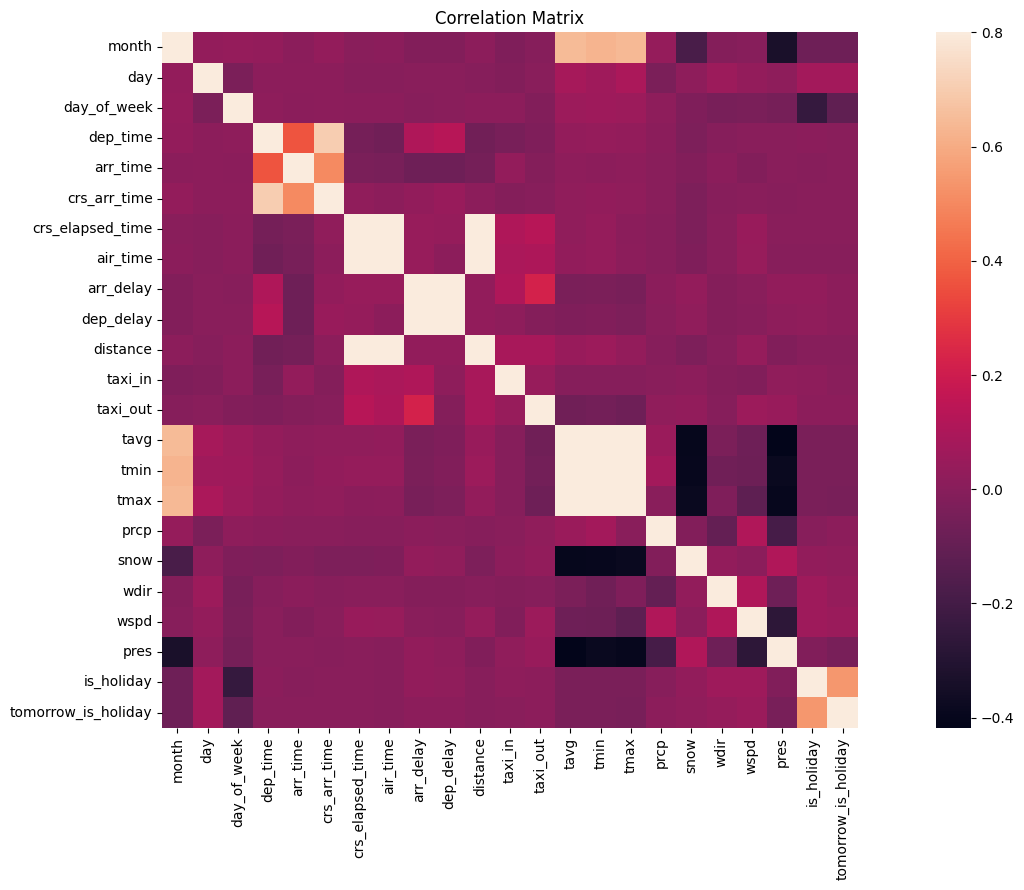

In [15]:
# correlation matrix
corrmat = numeric_data.corr()

# heatmap
f, ax = plt.subplots(figsize = (16,9))
sns.heatmap(corrmat, vmax = 0.8, square = True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.savefig("Correlation Matrix.png")
plt.show()

Through the generated correlation matrix, it can be observed that some features in the dataset present multicollinearity, indicating that certain variables can be linearly predicted from others. This redundancy can complicate the analysis and the performance of predictive models. As a result, some unwanted variables may need to be removed to create a more manageable and efficient dataset.

Observations:
- Multicollinearity:
  - Features like tmin, tmax, and tavg (minimum, maximum, and average temperatures) exhibit high correlations with one another, which is expected as they are derived from the same data source. To reduce redundancy, one representative variable (e.g., tavg) can be retained.
  - dep_time (Departure Time) and arr_time (Arrival Time) also show strong correlation due to their temporal relationship.
  - crs_elapsed_time and actual_elapsed_time are correlated, indicating overlap between scheduled and actual durations.
- Arrival delay / Departure delay:
  - dep_delay (Departure Delay) exhibits a high positive correlation with arr_delay (Arrival Delay), which makes sense logically. If a flight departs late, it is likely to arrive late as well.
  - Although removing highly correlated features is standard practice, dep_delay should be retained because it holds critical predictive value for understanding and forecasting arrival delays.
- Low correlation with weather variables:
  - Variables such as snow, prcp (precipitation), and wspd (wind speed) show weak correlations with arr_delay and dep_delay. This suggests that, in this dataset, weather conditions might have a limited impact on flight delays, or the effect is not directly captured.

In [16]:
# t-test: compare delays between holiday and non-holiday
delays_holiday = flight_delay[flight_delay['is_holiday'] == 1]['arr_delay']
delays_non_holiday = flight_delay[flight_delay['is_holiday'] == 0]['arr_delay']

# t-test
t_stat, p_value = ttest_ind(delays_holiday, delays_non_holiday, nan_policy='omit')
print("\nT-test for holiday vs. non-holiday days:")
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")
if p_value < 0.05:
    print("Significant difference in delays between holiday and non-holiday")
else:
    print("No significant difference in delays between holiday and non-holiday")


T-test for holiday vs. non-holiday days:
T-statistic: 18.811, P-value: 0.000
Significant difference in delays between holiday and non-holiday


In [17]:
# group delays by airline
airline_delays = [group['arr_delay'].dropna() for _, group in flight_delay.groupby('unique_carrier')]

# perform Kruskal-Wallis test
kruskal_stat, kruskal_p = kruskal(*airline_delays)

print(f"Kruskal-Wallis test: H-statistic = {kruskal_stat:.3f}, p-value = {kruskal_p:.3f}")

if kruskal_p < 0.05:
    print("Significant differences exist between airlines")
else:
    print("No significant differences exist between airlines")

Kruskal-Wallis test: H-statistic = 11279.037, p-value = 0.000
Significant differences exist between airlines


Dunn's Test results


,AA,AS,B6,DL,EV,F9,HA,MQ,OO,UA,US,WN
AA,1.000000e+00,1.604153e-69,2.627228e-41,3.198799e-143,5.625215e-31,0.000000e+00,1.898445e-73,4.528055e-05,1.538213e-06,1.824075e-30,8.528132e-111,0.000000e+00
AS,1.604153e-69,1.000000e+00,6.011949e-129,1.000000e+00,1.618307e-18,1.690704e-137,2.556608e-24,2.008927e-49,1.910286e-45,5.894979e-122,4.653776e-02,1.697147e-29
B6,2.627228e-41,6.011949e-129,1.000000e+00,2.302471e-196,6.832735e-92,0.000000e+00,5.589074e-107,1.699846e-59,2.715628e-61,4.639107e-08,5.556096e-169,0.000000e+00
DL,3.198799e-143,1.000000e+00,2.302471e-196,1.000000e+00,2.871955e-27,3.693517e-218,2.468513e-29,4.715802e-95,3.060782e-84,1.414550e-250,2.008214e-01,1.882754e-97
EV,5.625215e-31,1.618307e-18,6.832735e-92,2.871955e-27,1.000000e+00,0.000000e+00,4.087811e-49,7.910457e-13,4.440203e-10,1.474616e-92,2.824972e-15,1.380676e-262
F9,0.000000e+00,1.690704e-137,0.000000e+00,3.693517e-218,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.372844e-249,1.894777e-108
HA,1.898445e-73,2.556608e-24,5.589074e-107,2.468513e-29,4.087811e-49,1.000000e+00,1.000000e+00,4.212085e-65,1.697962e-63,3.821973e-94,4.629231e-34,1.664552e-09
MQ,4.528055e-05,2.008927e-49,1.699846e-59,4.715802e-95,7.910457e-13,0.000000e+00,4.212085e-65,1.000000e+00,1.000000e+00,3.011013e-55,3.968030e-69,0.000000e+00
OO,1.538213e-06,1.910286e-45,2.715628e-61,3.060782e-84,4.440203e-10,0.000000e+00,1.697962e-63,1.000000e+00,1.000000e+00,1.701241e-56,2.304305e-60,0.000000e+00
UA,1.824075e-30,5.894979e-122,4.639107e-08,1.414550e-250,1.474616e-92,0.000000e+00,3.821973e-94,3.011013e-55,1.701241e-56,1.000000e+00,2.756054e-210,0.000000e+00


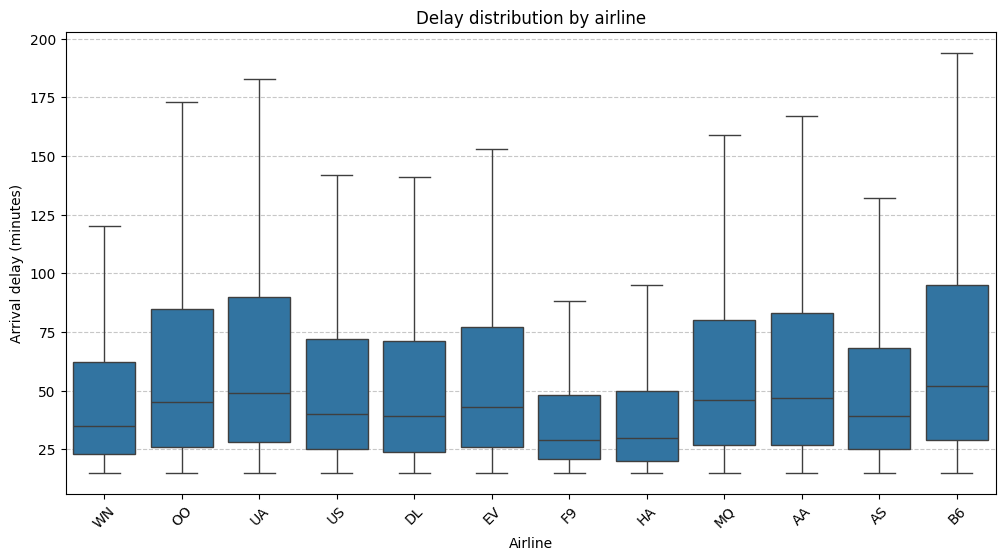

In [18]:
# create a df with airlines and delays
data_for_posthoc = flight_delay[['unique_carrier', 'arr_delay']].dropna()

# perform Dunn's test with Bonferroni adjustment for p-values
posthoc_results = posthoc_dunn(data_for_posthoc, val_col='arr_delay', group_col='unique_carrier', p_adjust='bonferroni')

print("Dunn's Test results")
display(posthoc_results)

plt.figure(figsize=(12, 6))
sns.boxplot(x='unique_carrier', y='arr_delay', data=flight_delay, showfliers=False)
plt.title("Delay distribution by airline")
plt.xlabel("Airline")
plt.ylabel("Arrival delay (minutes)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

These results reveal significant differences between most airline pairs. Airlines like B6 (JetBlue) exhibit higher median delays and a wider range of delay times compared to others, indicating a generally worse performance. On the other hand, WN (Southwest Airlines) shows smaller median delays and a tighter distribution, suggesting more consistent punctuality.

Significant p-values (<0.05) confirm that most airlines differ statistically in their delay distributions. For example, AA (American Airlines) has significant differences with B6, MQ, and other carriers, reflecting noticeable variation in delay patterns. However, there are pairs (e.g., F9 and HA) where the differences are not statistically significant (p > 0.05), indicating comparable delay distributions between these airlines.

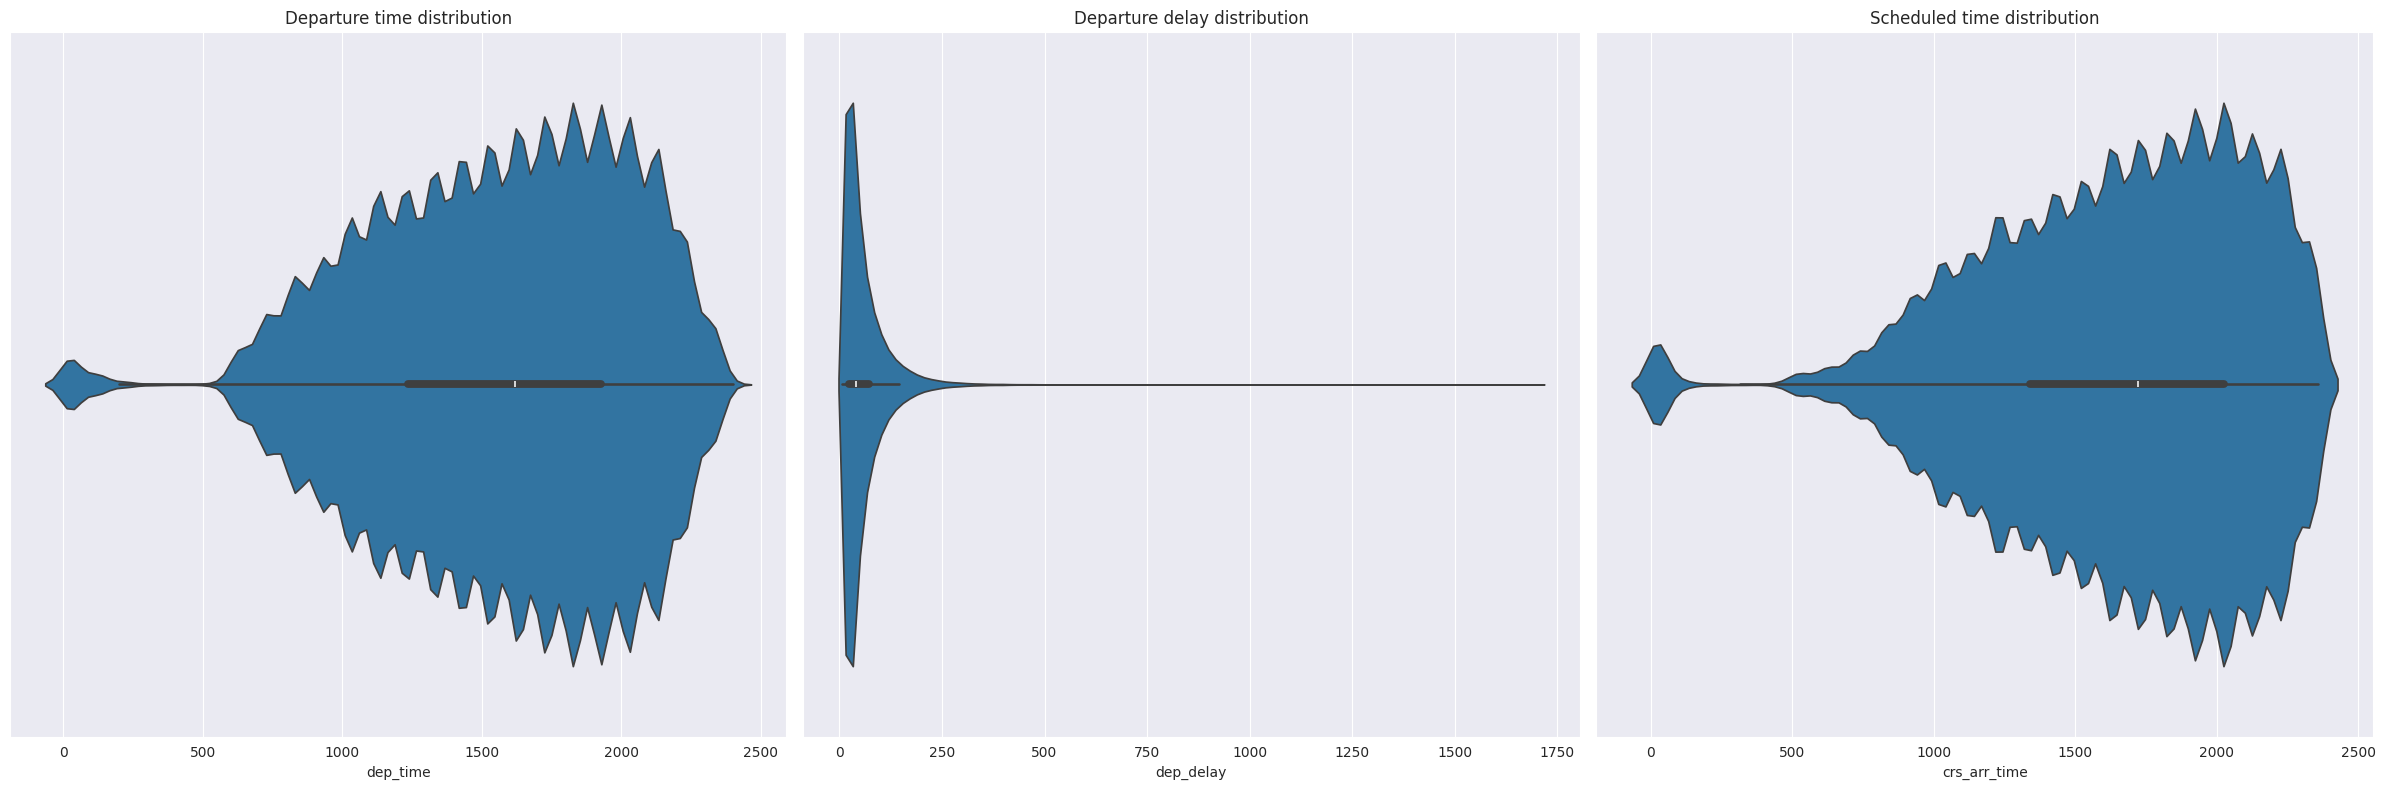

In [19]:
sns.set_style('darkgrid')
f,ax=plt.subplots(1,3,figsize=(24,8))
sns.violinplot(data=flight_delay, x='dep_time', ax=ax[0])
ax[0].set_title('Departure time distribution')
sns.violinplot(data=flight_delay, x='dep_delay', ax=ax[1])
ax[1].set_title('Departure delay distribution')
sns.violinplot(data=flight_delay, x='crs_arr_time', ax=ax[2])
ax[2].set_title('Scheduled time distribution')
plt.tight_layout()
plt.show()

Departure time distribution: peaks likely correspond to standard operational windows of airports, such as early morning and evening hours, meanwhile off-peak times show minimal departures.
Departure delay distribution: the bulk of delays are centered around the median values, but the tails indicate some extreme cases. There are significant outliers, which may need further investigation for root causes.
Scheduled time distribution: reflects operational scheduling patterns for airlines, patterns may align closely with the departure times, indicating strategic scheduling to optimize airport and airline operations.

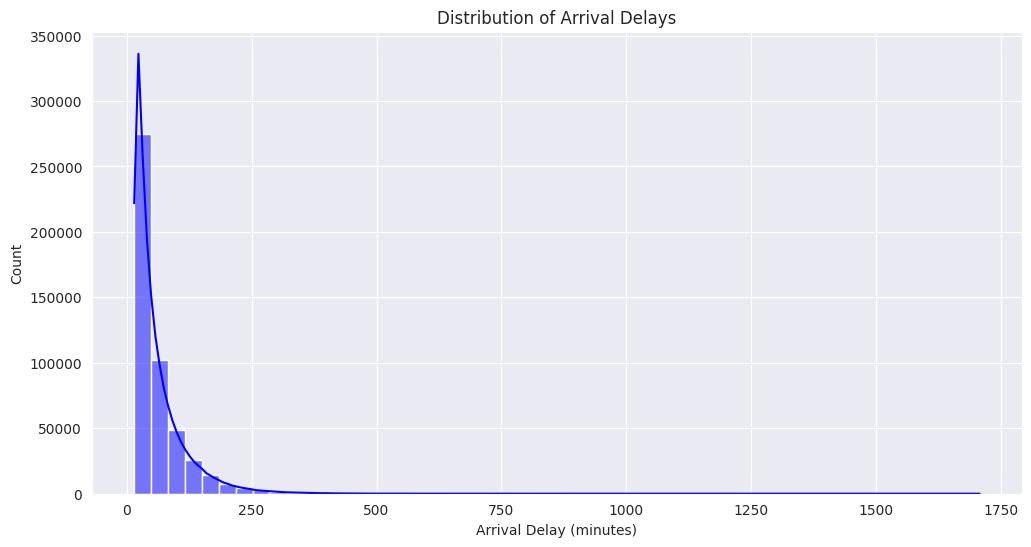

In [20]:
# distribution of arrival delays
plt.figure(figsize=(12, 6))
sns.histplot(flight_delay['arr_delay'], bins=50, kde=True, color='blue')
plt.title('Distribution of Arrival Delays')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Count')
plt.show()

The histogram shows that the majority of arrival delays are concentrated at lower values (closer to 0), with a long tail indicating some extremely delayed flights. This suggests a heavily skewed distribution, highlighting the need to handle outliers appropriately during analysis or modeling.

In [21]:
# calculate summary statistics to confirm skewness
arrival_delay_skewness = flight_delay['arr_delay'].skew()
arrival_delay_kurtosis = flight_delay['arr_delay'].kurt()
print(f"Skewness: {arrival_delay_skewness}")
print(f"Kurtosis: {arrival_delay_kurtosis}")

Skewness: 3.787280754896966
Kurtosis: 33.99632347366879


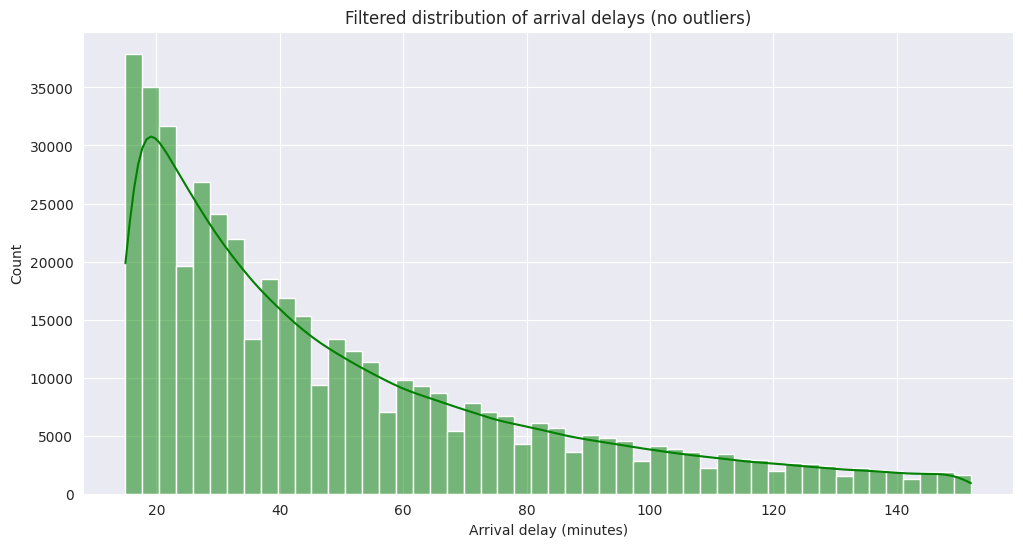

In [22]:
# detect and handle outliers for arrival delays
Q1 = flight_delay['arr_delay'].quantile(0.25)
Q3 = flight_delay['arr_delay'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# filter data to remove outliers
filtered_delays = flight_delay[(flight_delay['arr_delay'] >= lower_bound) &
                               (flight_delay['arr_delay'] <= upper_bound)]

plt.figure(figsize=(12, 6))
sns.histplot(filtered_delays['arr_delay'], bins=50, kde=True, color='green')
plt.title('Filtered distribution of arrival delays (no outliers)')
plt.xlabel('Arrival delay (minutes)')
plt.ylabel('Count')
plt.show()

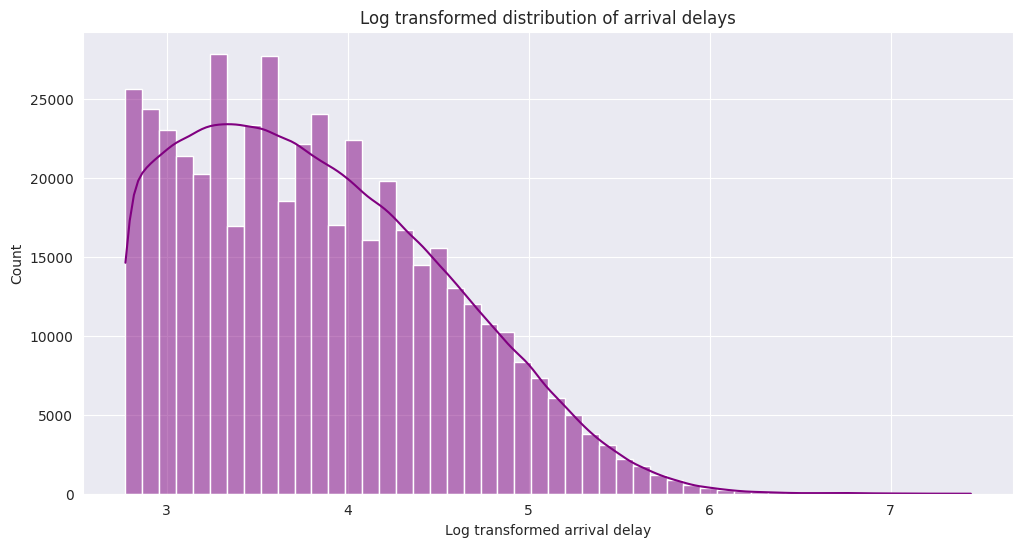

In [23]:
# log transformation to normalize
flight_delay['arr_delay_log'] = np.log1p(flight_delay['arr_delay'])

plt.figure(figsize=(12, 6))
sns.histplot(flight_delay['arr_delay_log'], bins=50, kde=True, color='purple')
plt.title('Log transformed distribution of arrival delays')
plt.xlabel('Log transformed arrival delay')
plt.ylabel('Count')
plt.show()

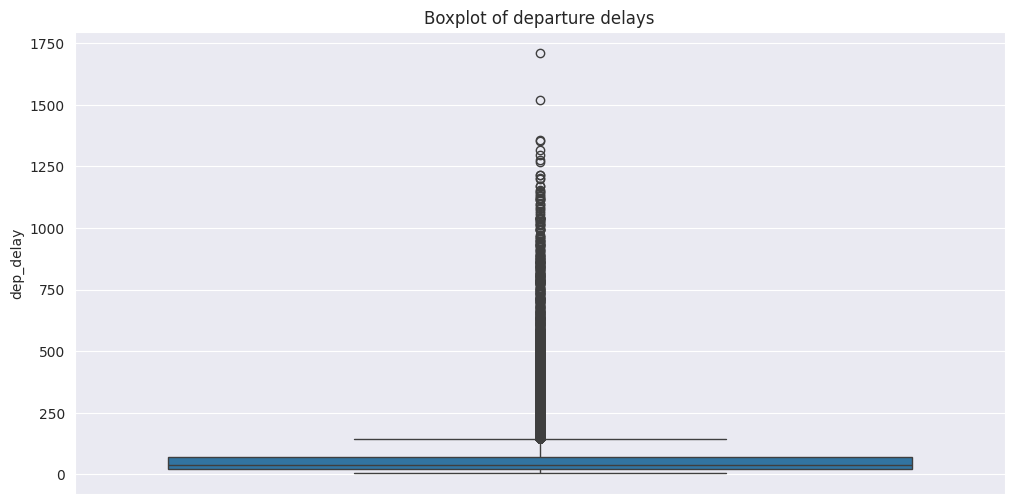

In [24]:
# boxplot for departure delays
plt.figure(figsize=(12, 6))
sns.boxplot(y='dep_delay', data=flight_delay)
plt.title('Boxplot of departure delays')
plt.show()

The boxplot reveals a similar pattern with many outliers, where the bulk of departure delays cluster within a small range, but there are numerous extreme values. The spread indicates variability in how flights handle departures, potentially influenced by external factors such as weather or airport operations.

In [25]:
# outlier analysis for departure delays
Q1 = flight_delay['dep_delay'].quantile(0.25)
Q3 = flight_delay['dep_delay'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR

# identify outliers
outliers = flight_delay[flight_delay['dep_delay'] > upper_limit]
non_outliers = flight_delay[flight_delay['dep_delay'] <= upper_limit]

print(f"Number of outliers: {len(outliers)}")
print(f"Number of non-outliers: {len(non_outliers)}")

Number of outliers: 31879
Number of non-outliers: 452670


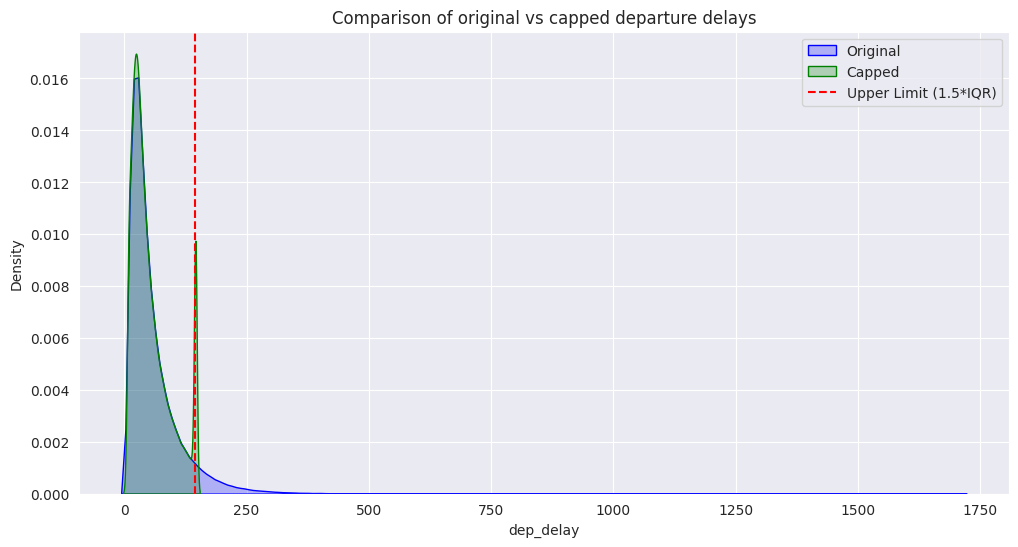

In [26]:
# cap outliers at the upper limit
flight_delay['dep_delay_capped'] = flight_delay['dep_delay'].apply(lambda x: min(x, upper_limit))

# side-by-side comparison
plt.figure(figsize=(12, 6))
sns.kdeplot(flight_delay['dep_delay'], label='Original', fill=True, color='blue')
sns.kdeplot(flight_delay['dep_delay_capped'], label='Capped', fill=True, color='green')
plt.axvline(upper_limit, color='red', linestyle='--', label='Upper Limit (1.5*IQR)')
plt.title("Comparison of original vs capped departure delays")
plt.legend()
plt.show()

This histogram displays the adjusted dataset after removing outliers. The distribution is more concentrated around lower delay values, reflecting a cleaned dataset for analysis.

The blue density plot represents the original data, including outliers. The green density plot shows the filtered data after removing delays above the upper limit. The red dashed line marks the cutoff for outliers. The density beyond this threshold highlights the removed values.

Then, the removal of outliers significantly reduces the extreme values in departure delays, providing a more normalized dataset. The filtered dataset is better suited for predictive modeling or statistical analysis as it minimizes the influence of extreme anomalies.



In [27]:
# group analysis for utliers
outliers = flight_delay[flight_delay['dep_delay'] > upper_limit]
outlier_analysis = outliers.groupby(['origin', 'day_of_week']).size().reset_index(name='count')
print("Top outlier contributors:")
print(outlier_analysis.sort_values(by='count', ascending=False).head())

Top outlier contributors:
     origin  day_of_week  count
1101    ORD            5    780
1097    ORD            1    746
1098    ORD            2    669
1100    ORD            4    541
1103    ORD            7    455


The origin airport ORD (Chicago O'Hare International) is the dominant source of departure delay outliers, appearing consistently across all days of the week. The highest number of outliers occurs on Friday (day_of_week = 5), suggesting a surge in delays at the end of the workweek. Outliers from ORD are not isolated to a specific day, but Fridays and Mondays (day_of_week = 1) have the highest counts, potentially reflecting increased traffic or operational challenges during these days.

<ipython-input-28-dac921ab1a60>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='count', data=ord_seasonal, palette='coolwarm')


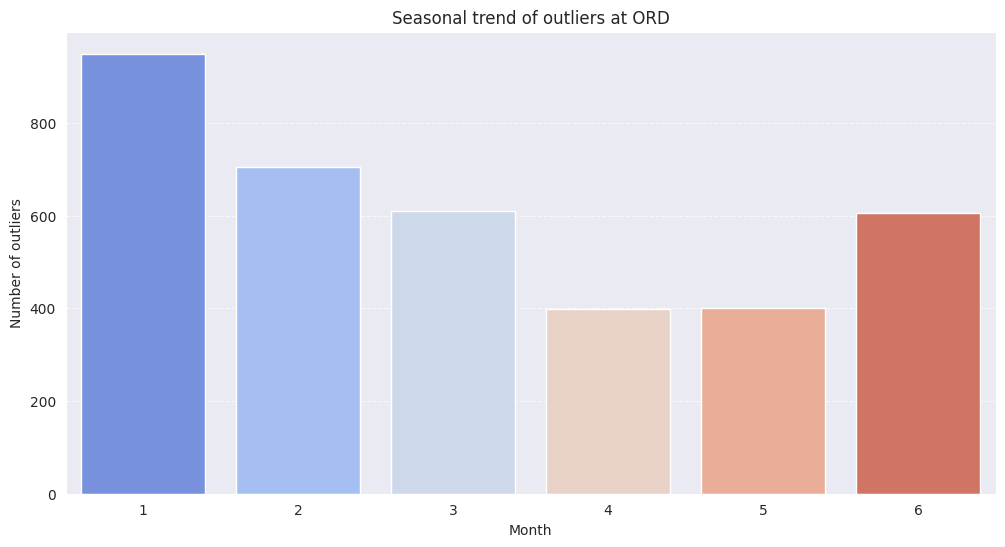

In [28]:
# filter outliers for ORD
ord_outliers = outliers[outliers['origin'] == 'ORD']

# group by month to examine seasonal trends
ord_seasonal = ord_outliers.groupby('month').size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='count', data=ord_seasonal, palette='coolwarm')
plt.title('Seasonal trend of outliers at ORD')
plt.xlabel('Month')
plt.ylabel('Number of outliers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The highest number of outliers occurs in January, which is consistent with winter weather conditions (snow, storms) causing significant delays at Chicago O'Hare International Airport (ORD).

In [29]:
# investigate weather conditions for ORD outliers
weather_factors = ['tavg', 'prcp', 'snow', 'wdir', 'wspd']
ord_weather = ord_outliers[weather_factors].mean().reset_index(name='mean_value')
ord_weather.columns = ['Weather factor', 'Mean value']

print("Weather conditions for outliers at ORD:")
display(ord_weather)

Weather conditions for outliers at ORD:


,Weather factor,Mean value
0,tavg,3.847955
1,prcp,3.102726
2,snow,30.188113
3,wdir,165.743730
4,wspd,16.241685


<ipython-input-30-25ffe3800f1a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='unique_carrier', data=ord_airline, palette='viridis')


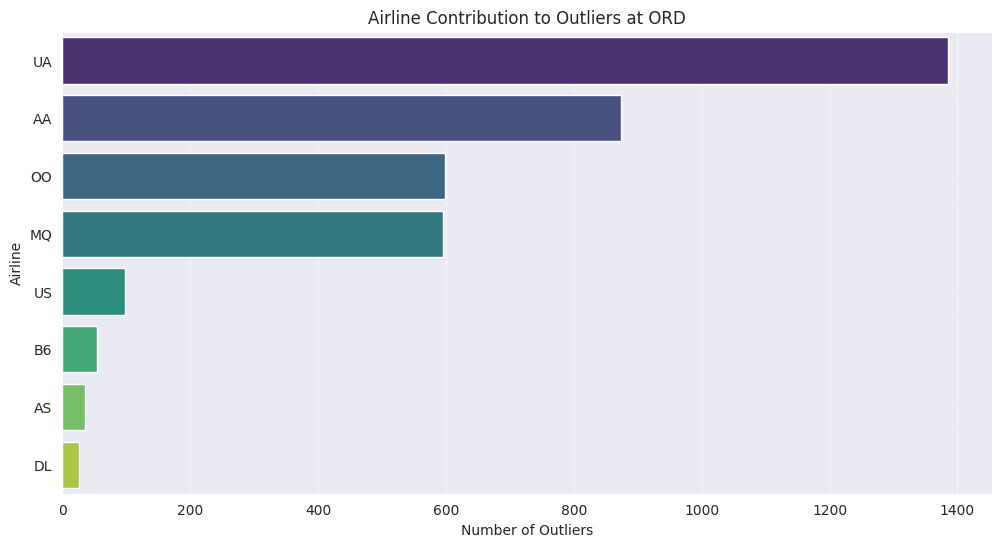

In [30]:
# group outliers by airline at ORD
ord_airline = ord_outliers.groupby('unique_carrier').size().reset_index(name='count')
ord_airline = ord_airline.sort_values(by='count', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='unique_carrier', data=ord_airline, palette='viridis')
plt.title('Airline Contribution to Outliers at ORD')
plt.xlabel('Number of Outliers')
plt.ylabel('Airline')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

United Airlines (UA) has the highest number of outliers at ORD, contributing over 1400 outliers, which is significantly more than other airlines. This is expected as ORD is a major hub for United Airlines, leading to a higher operational footprint.

Smaller contributions are observed from other airlines, such as US Airways (US), JetBlue (B6), and Delta (DL). These airlines have fewer flights at ORD, leading to fewer outliers.

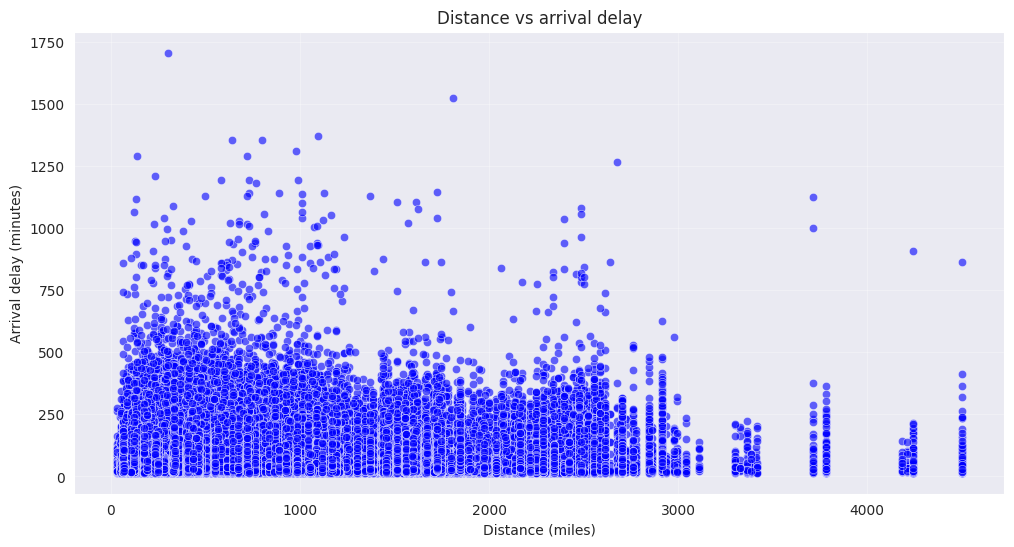

In [31]:
# scatterplot for relationships
# distance vs arrival delay
plt.figure(figsize=(12, 6))
sns.scatterplot(x='distance', y='arr_delay', data=flight_delay, alpha=0.6, color='blue')
plt.title('Distance vs arrival delay')
plt.xlabel('Distance (miles)')
plt.ylabel('Arrival delay (minutes)')
plt.grid(alpha=0.3)
plt.show()

In [32]:
correlation = flight_delay['distance'].corr(flight_delay['arr_delay'])
print(f"Correlation between distance and arrival delay: {correlation}")

Correlation between distance and arrival delay: 0.027743492054304774


In [33]:
flight_delay['distance_category'] = pd.cut(flight_delay['distance'], bins=[0, 1000, 2000, 3000, 4000], labels=['Short-haul', 'Medium-haul', 'Long-haul', 'Ultra-long-haul'])

category_analysis = flight_delay.groupby('distance_category')['arr_delay'].mean().reset_index()
print(category_analysis)

  distance_category  arr_delay
0        Short-haul  60.189377
1       Medium-haul  62.287279
2         Long-haul  66.572775
3   Ultra-long-haul  69.720988


<ipython-input-33-5e7bb3f3ce8b>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_analysis = flight_delay.groupby('distance_category')['arr_delay'].mean().reset_index()


In [34]:
extreme_delays = flight_delay[flight_delay['arr_delay'] > 1000]
print(extreme_delays[['origin', 'dest', 'unique_carrier', 'arr_delay', 'distance']].head())

      origin dest unique_carrier  arr_delay  distance
29083    LAX  OGG             UA       1081      2486
68146    OGG  LAX             AA       1057      2486
68580    SNA  ORD             AA       1147      1726
69202    MIA  DFW             AA       1032      1121
74130    DEN  DFW             AA       1357       641


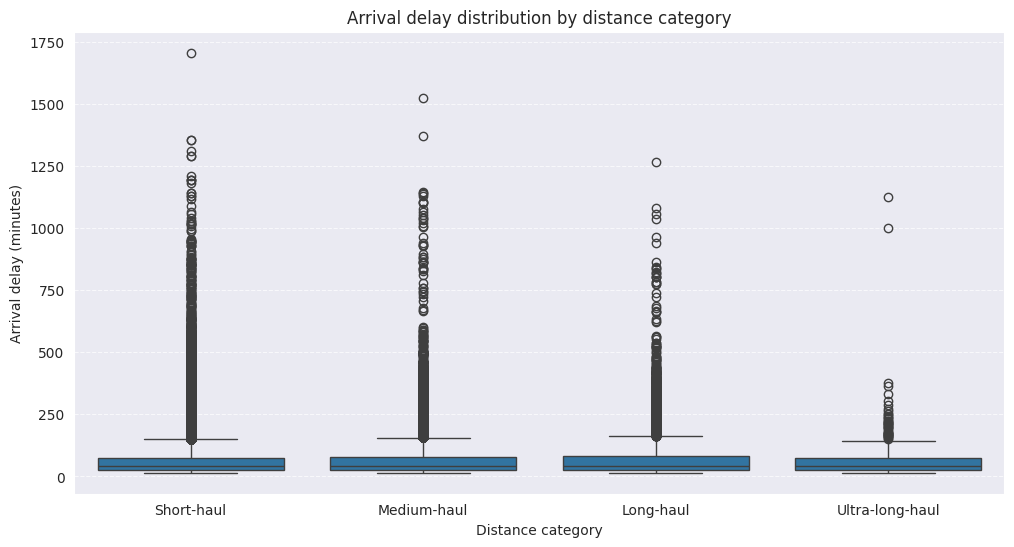

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='distance_category', y='arr_delay', data=flight_delay)
plt.title('Arrival delay distribution by distance category')
plt.xlabel('Distance category')
plt.ylabel('Arrival delay (minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The correlation between distance and arrival delay is negligible, suggesting that distance alone does not strongly influence arrival delays.

Short-haul flights have the lowest average delays (60.19 minutes), while ultra-long-haul flights experience the highest (69.72 minutes). This increase is minimal and might not be operationally significant.

Extreme delays (>1000 minutes) are observed in all distance categories, indicating that factors other than distance are contributing to these outliers.

### Group and Aggregate Analysis
Analyze delays grouped by categorical variables such as ariline, day of week and month

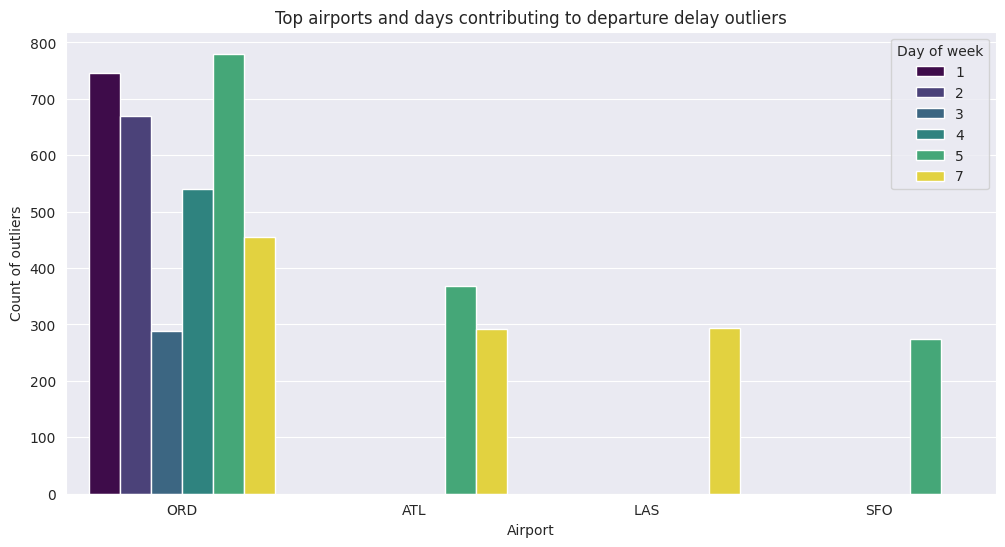

In [36]:
# group by airport and day of week
airport_day_outliers = outliers.groupby(['origin', 'day_of_week']).size().reset_index(name='count')

# visualize top contributors
top_airports_days = airport_day_outliers.sort_values(by='count', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='origin', y='count', hue='day_of_week', data=top_airports_days, palette='viridis')
plt.title("Top airports and days contributing to departure delay outliers")
plt.xlabel("Airport")
plt.ylabel("Count of outliers")
plt.legend(title="Day of week")
plt.show()

Airports such as ORD (Chicago O'Hare) and ATL (Atlanta Hartsfield) exhibit the highest counts of departure delay outliers. Delays are most frequent on specific days of the week, particularly Mondays (Day 1) and Fridays (Day 5) for ORD, which could be linked to high traffic on these days. This pattern may be associated with the start or end of business weeks or leisure travel peaks. By labeling the days explicitly, it becomes easier to identify temporal trends and their potential causes.

Difference in average weather conditions (outliers vs. non-outliers):
prcp    0.115880
snow    2.583345
wspd    0.002333
dtype: float64


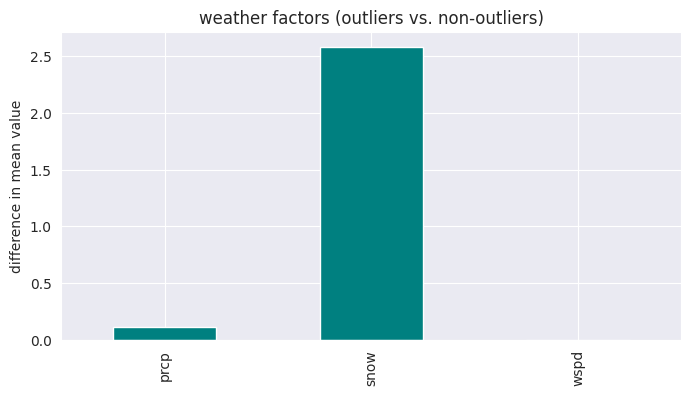

In [37]:
# compare average weather conditions for outliers vs. non-outliers
weather_comparison = outliers[['prcp', 'snow', 'wspd']].mean() - non_outliers[['prcp', 'snow', 'wspd']].mean()

print("Difference in average weather conditions (outliers vs. non-outliers):")
print(weather_comparison)

# visualize the differences
weather_comparison.plot(kind='bar', color='teal', figsize=(8, 4), title='weather factors (outliers vs. non-outliers)')
plt.ylabel("difference in mean value")
plt.show()

Snow has a significant impact on delay outliers compared to other weather factors such as precipitation (prcp) or wind speed (wspd). This reinforces the operational challenges during snowy conditions, particularly in regions prone to harsh winters.

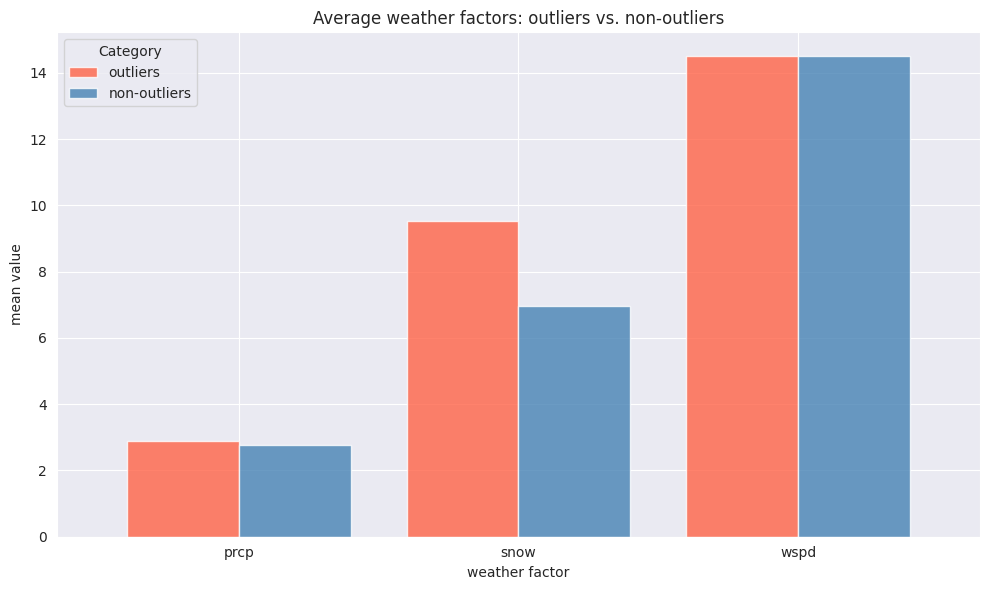

In [38]:
# calculate mean weather conditions for outliers and non-outliers
outliers_weather_means = outliers[['prcp', 'snow', 'wspd']].mean()
non_outliers_weather_means = non_outliers[['prcp', 'snow', 'wspd']].mean()

# create a df for visualization
weather_comparison_df = pd.DataFrame({'outliers': outliers_weather_means,'non-outliers': non_outliers_weather_means
}).reset_index().rename(columns={'index': 'weather factor'})

# comparison
plt.figure(figsize=(10, 6))
weather_comparison_df.plot(
    kind='bar',
    x='weather factor',
    ax=plt.gca(),
    width=0.8,
    color=['#FF6347', '#4682B4'],
    alpha=0.8,
)
plt.title('Average weather factors: outliers vs. non-outliers')
plt.ylabel('mean value')
plt.xticks(rotation=0)
plt.legend(title='Category')
plt.tight_layout()
plt.show()

This graph highlights the differences in average weather conditions between outliers and non-outliers. Outliers tend to occur under slightly more extreme weather conditions. Precipitation shows a marginal increase for outliers, while snow levels are significantly higher compared to non-outliers, indicating that snowy conditions might have a notable impact on extreme delays. Wind speed remains relatively consistent across both groups, suggesting it might not play a crucial role in creating extreme delays. These results suggest that snow is the most impactful weather factor when analyzing outliers in flight delays.

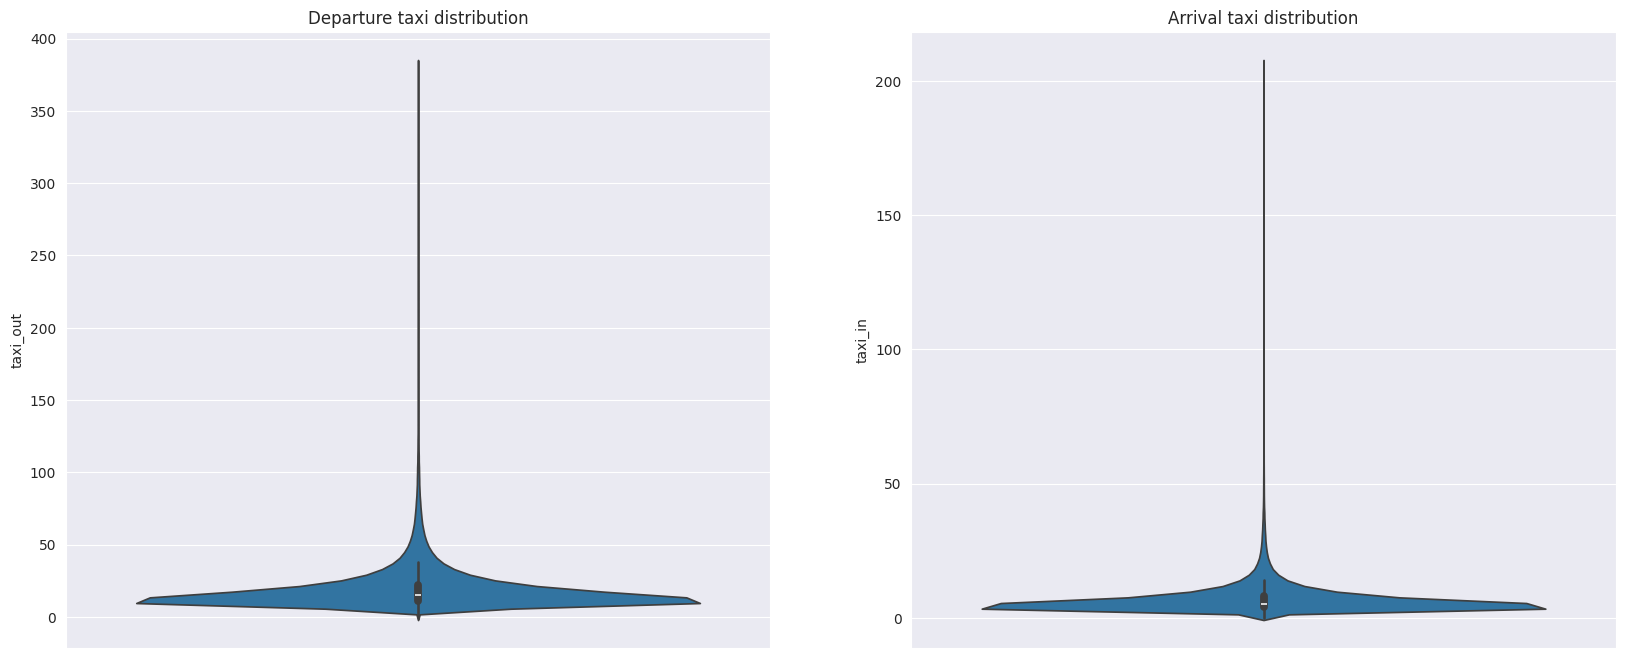

In [39]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.violinplot(data=flight_delay, y='taxi_out', orient='v', ax=ax[0])
ax[0].set_title('Departure taxi distribution')
sns.violinplot(data=flight_delay, y='taxi_in', orient='v', ax=ax[1])
ax[1].set_title('Arrival taxi distribution')
plt.close(2)
plt.show()

- Taxi-out Distribution: There seem to be significant outliers, with extremely high taxi-out times. Most data is concentrated at lower values, indicating that taxi-out is generally short, but some cases require further review.
- Taxi-in Distribution: a similar pattern emerges with a narrower range and fewer extreme outliers compared to taxi-out.

It suggests that taxi-in delays are generally less pronounced than taxi-out delays.

In [40]:
# define a function to identify outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)], lower_bound, upper_bound

# detect outliers for taxi_out
taxi_out_outliers, taxi_out_lower, taxi_out_upper = detect_outliers_iqr(flight_delay, 'taxi_out')
print(f"Taxi-out outliers: {len(taxi_out_outliers)}")
print(f"Taxi-out range: [{taxi_out_lower}, {taxi_out_upper}]")

# detect outliers for taxi_in
taxi_in_outliers, taxi_in_lower, taxi_in_upper = detect_outliers_iqr(flight_delay, 'taxi_in')
print(f"Taxi-in outliers: {len(taxi_in_outliers)}")
print(f"Taxi-in range: [{taxi_in_lower}, {taxi_in_upper}]")

# remove outliers for clean dataset
clean_flight_delay = flight_delay[
    (flight_delay['taxi_out'] >= taxi_out_lower) & (flight_delay['taxi_out'] <= taxi_out_upper) &
    (flight_delay['taxi_in'] >= taxi_in_lower) & (flight_delay['taxi_in'] <= taxi_in_upper)
]

print(f"Clean dataset shape: {clean_flight_delay.shape}")

Taxi-out outliers: 36185
Taxi-out range: [-5.5, 38.5]
Taxi-in outliers: 27869
Taxi-in range: [-2.0, 14.0]
Clean dataset shape: (422638, 31)


    origin  taxi_out
167    ORD      5219
116    JFK      3795
127    LGA      2687
13     ATL      2267
174    PHL      1993
..     ...       ...
141    MEI         1
122    LAW         1
207    SGU         1
49     COD         1
74     EYW         1

[239 rows x 2 columns]
    dest  taxi_in
119  ORD     4844
6    ATL     4694
42   DFW     4623
85   LAX     2324
80   JFK     1759
..   ...      ...
101  MGM        1
110  MSO        1
23   CAE        1
128  PSG        1
170  YUM        1

[171 rows x 2 columns]


<ipython-input-41-7a0f0f6fc596>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='origin', y='taxi_out', data=taxi_out_by_airport.head(10), palette='viridis')


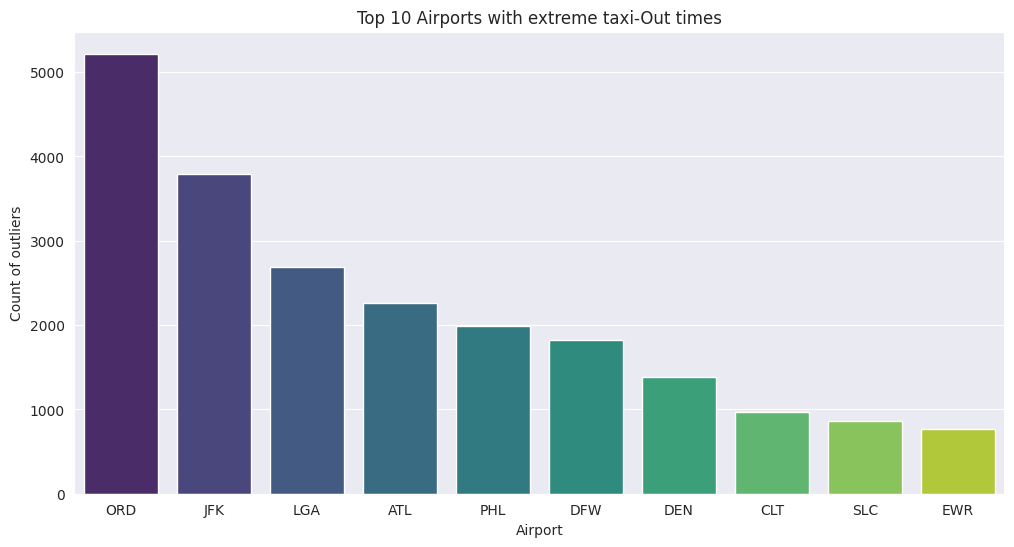

<ipython-input-41-7a0f0f6fc596>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dest', y='taxi_in', data=taxi_in_by_airport.head(10), palette='viridis')


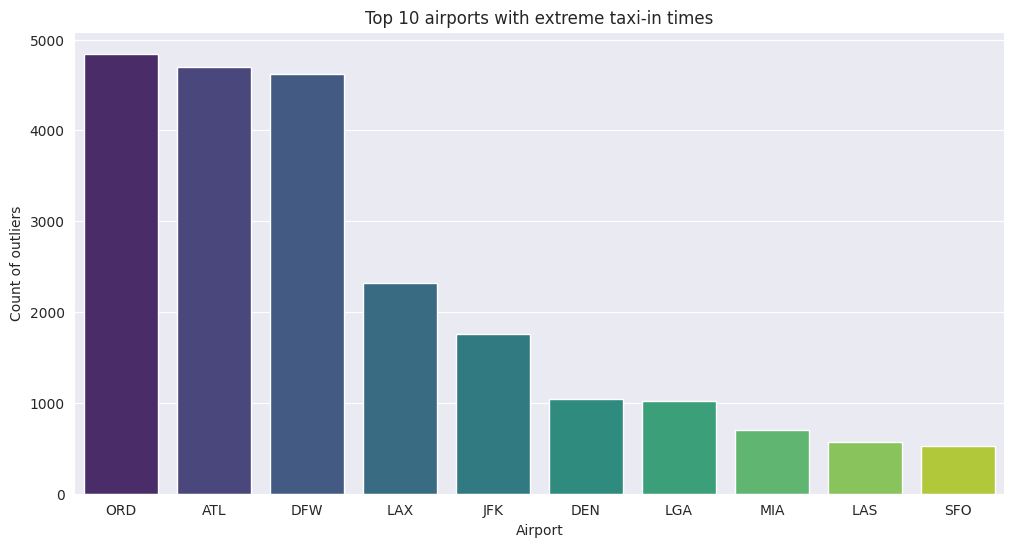

In [41]:
# group outliers by origin airport for taxi_out
taxi_out_by_airport = taxi_out_outliers.groupby('origin')['taxi_out'].count().reset_index().sort_values(by='taxi_out', ascending=False)
print(taxi_out_by_airport)

# group outliers by destination airport for taxi_in
taxi_in_by_airport = taxi_in_outliers.groupby('dest')['taxi_in'].count().reset_index().sort_values(by='taxi_in', ascending=False)
print(taxi_in_by_airport)

plt.figure(figsize=(12, 6))
sns.barplot(x='origin', y='taxi_out', data=taxi_out_by_airport.head(10), palette='viridis')
plt.title('Top 10 Airports with extreme taxi-Out times')
plt.ylabel('Count of outliers')
plt.xlabel('Airport')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='dest', y='taxi_in', data=taxi_in_by_airport.head(10), palette='viridis')
plt.title('Top 10 airports with extreme taxi-in times')
plt.ylabel('Count of outliers')
plt.xlabel('Airport')
plt.show()

Taxi-out weather factors:
prcp     3.199525
snow     9.948791
wspd    15.354752
dtype: float64
Taxi-in weather factors:
prcp     2.873942
snow     7.493164
wspd    14.113581
dtype: float64


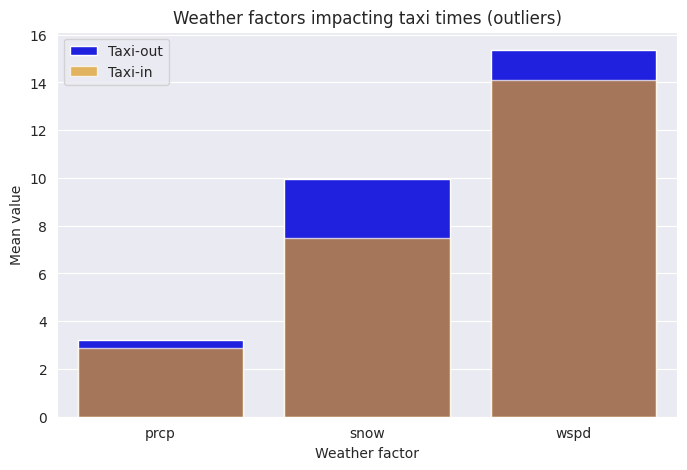

In [42]:
# compare average weather conditions for taxi_out and taxi_in outliers
weather_columns = ['prcp', 'snow', 'wspd']

# analyze weather for taxi_out outliers
taxi_out_weather = taxi_out_outliers[weather_columns].mean()
print("Taxi-out weather factors:")
print(taxi_out_weather)

# analyze weather for taxi_in outliers
taxi_in_weather = taxi_in_outliers[weather_columns].mean()
print("Taxi-in weather factors:")
print(taxi_in_weather)

weather_impact = pd.DataFrame({'Taxi-out': taxi_out_weather,'Taxi-in': taxi_in_weather}).reset_index().rename(columns={'index': 'Weather factor'})

plt.figure(figsize=(8, 5))
sns.barplot(x='Weather factor', y='Taxi-out', data=weather_impact, color='blue', label='Taxi-out')
sns.barplot(x='Weather factor', y='Taxi-in', data=weather_impact, color='orange', label='Taxi-in', alpha=0.7)
plt.title('Weather factors impacting taxi times (outliers)')
plt.ylabel('Mean value')
plt.legend()
plt.show()

Wind speed appears to have the highest correlation with increased taxi times for both taxi-in and taxi-out, especially for taxi-out, which could be due to delayed ground operations caused by strong winds, affecting aircraft maneuvering and takeoff sequencing.

Snow significantly impacts taxi times, with a slightly higher effect on taxi-out times than taxi-in times. This makes sense as snow could slow down ground operations during departure preparations.

While precipitation's impact is smaller compared to snow and wind speed, precipitation still influences taxi times. The effects may vary depending on the intensity and type of precipitation.

### Advanced visualizations
Use of scatterplots, pairplots and heatmaps to explore relationships and interactions between variables.

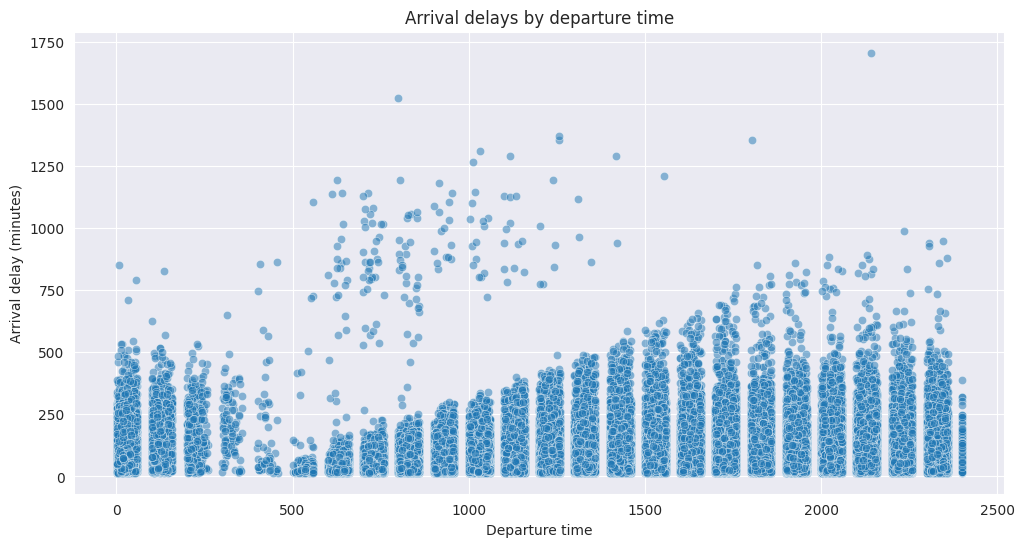

In [43]:
# departure time vs arrival delay
plt.figure(figsize=(12, 6))
sns.scatterplot(x='dep_time', y='arr_delay', data=flight_delay, alpha=0.5)
plt.title('Arrival delays by departure time')
plt.xlabel('Departure time')
plt.ylabel('Arrival delay (minutes)')
plt.show()

There appears to be a higher density of arrival delays around specific departure time intervals, possibly early morning and late afternoon. These clusters could indicate peak traffic times where flights are more prone to delays due to congestion.

Several points in the plot highlight extreme arrival delays (> 1000 minutes). These outliers may be due to rare events like severe weather, mechanical issues, or logistical problems. While delays are present across all departure times, certain ranges show more consistent delays, suggesting systemic issues during those timeframes.

Departure times closer to midnight or very early morning seem to have fewer and smaller delays, likely due to less congestion and fewer operational disruptions.

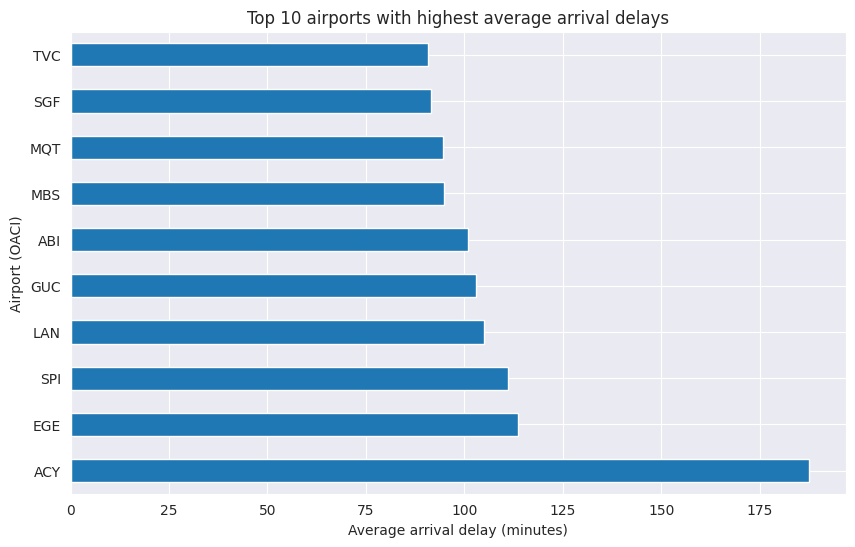

In [44]:
# top 10 airports with the highest average arrival delay
top_airports = flight_delay.groupby('origin')['arr_delay'].mean().nlargest(10)
top_airports.plot(kind='barh', figsize=(10, 6))
plt.title('Top 10 airports with highest average arrival delays')
plt.xlabel('Average arrival delay (minutes)')
plt.ylabel('Airport (OACI)')
plt.show()

The airports listed exhibit significantly higher average arrival delays, with ACY airport (Atlantic City) leading by a substantial margin. Many airports in the list (TVC, SGF, MQT...) are regional, suggesting that smaller airports may face challenges like limited infrastructure or operational inefficiencies.

Airports such as EGE (Eagle County) are likely affected by seasonal factors, weather conditions, or geography.


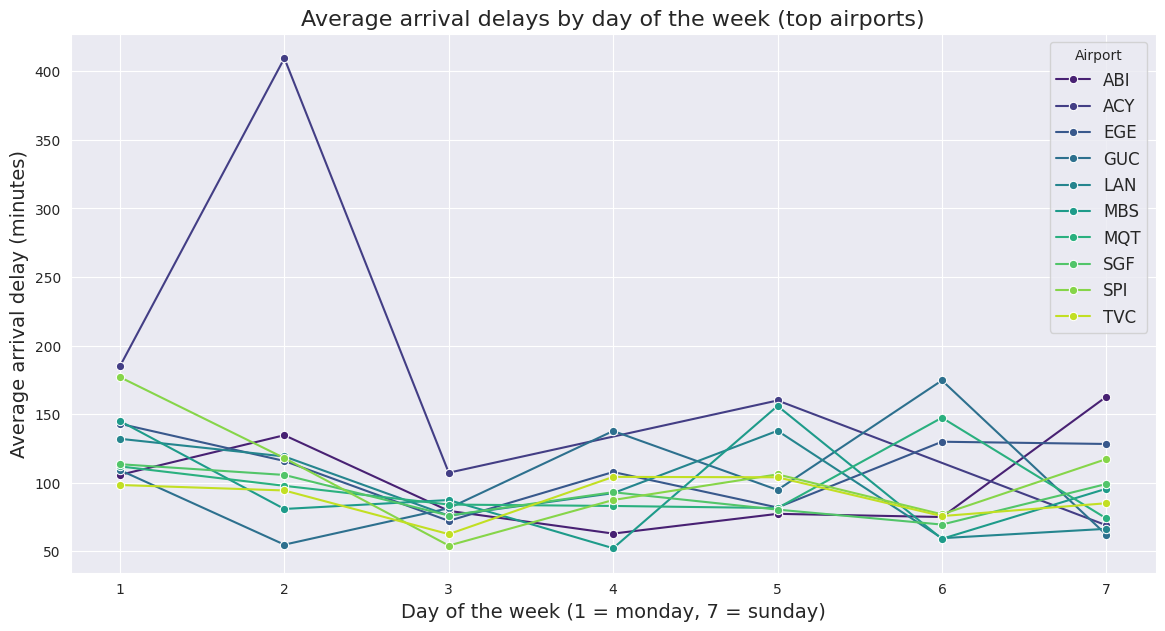

In [45]:
# group by aairport and day of the week
airport_day_delay = flight_delay.groupby(['origin', 'day_of_week'])[['arr_delay', 'dep_delay']].mean().reset_index()

# top airports with the highest delays identified earlier
top_airports = top_airports.index.tolist()
filtered_data = airport_day_delay[airport_day_delay['origin'].isin(top_airports)]

plt.figure(figsize=(14, 7))
sns.lineplot(data=filtered_data, x='day_of_week', y='arr_delay', hue='origin', marker='o', palette='viridis')
plt.title('Average arrival delays by day of the week (top airports)', fontsize=16)
plt.xlabel('Day of the week (1 = monday, 7 = sunday)', fontsize=14)
plt.ylabel('Average arrival delay (minutes)', fontsize=14)
plt.legend(title='Airport', fontsize=12)
plt.grid(True)
plt.show()

This chart shows the average delays by day of the week at airports with the highest average delays. It can be observed that delay patterns vary significantly depending on the airport and the day of the week. For instance, ABI airport experiences extreme delays on Mondays, possibly related to specific operational conditions or increased traffic on that particular day. At other airports, such as SGF or EGE, delays are more consistent throughout the week, suggesting less seasonal or day-specific issues.

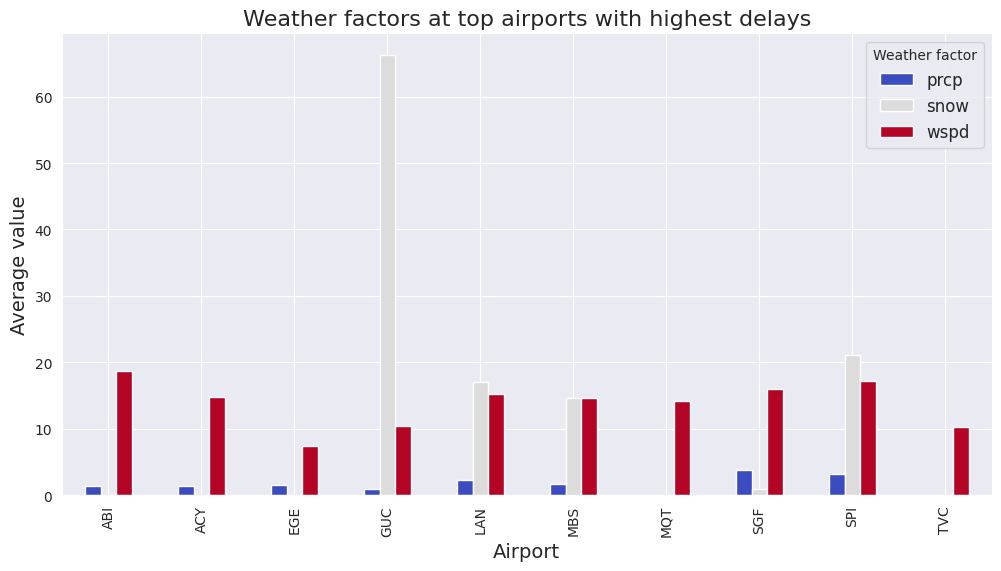

In [46]:
# group meteorological data by airport
weather_by_airport = flight_delay.groupby('origin')[['prcp', 'snow', 'wspd']].mean().reset_index()

# top airports with the highest delays
weather_filtered = weather_by_airport[weather_by_airport['origin'].isin(top_airports)]

weather_filtered.set_index('origin').plot(kind='bar', figsize=(12, 6), colormap='coolwarm')
plt.title('Weather factors at top airports with highest delays', fontsize=16)
plt.ylabel('Average value', fontsize=14)
plt.xlabel('Airport', fontsize=14)
plt.legend(title='Weather factor', fontsize=12)
plt.grid(True)
plt.show()

This chart examines the average weather factors (precipitation, snow, and wind speed) at airports with the highest delays. GUC and SPI stand out for having significantly high average snow values, indicating that winter conditions have a considerable impact on their delays. In contrast, airports like ABI and ACY show higher wind speed values, which may also contribute to delays. These insights highlight the need to analyze specific weather factors when studying delays at individual airports.

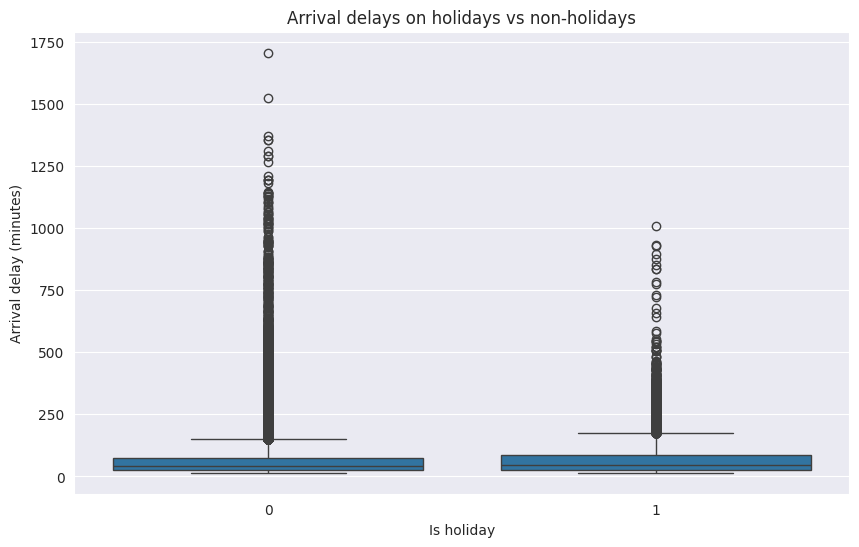

In [47]:
# arrival delay on holidays vs non-holidays
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_holiday', y='arr_delay', data=flight_delay)
plt.title('Arrival delays on holidays vs non-holidays')
plt.xlabel('Is holiday')
plt.ylabel('Arrival delay (minutes)')
plt.show()

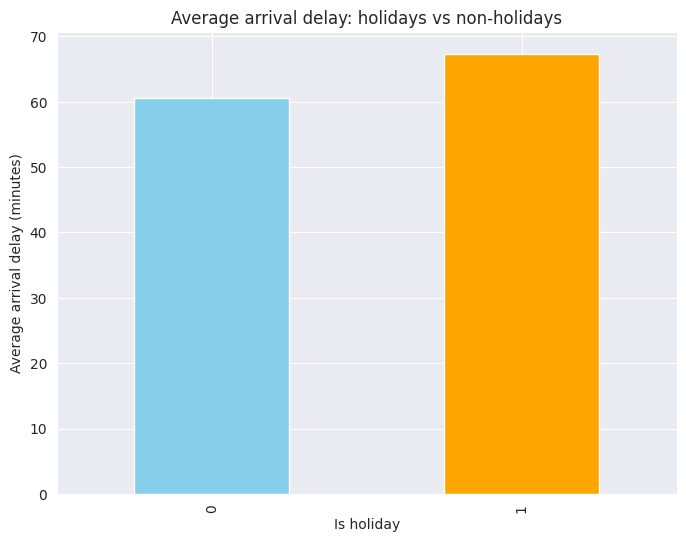

In [48]:
# average delay on holidays and non-holidays
holiday_delay = flight_delay.groupby('is_holiday')['arr_delay'].mean()
holiday_delay.plot(kind='bar', color=['skyblue', 'orange'], figsize=(8, 6))
plt.title('Average arrival delay: holidays vs non-holidays')
plt.xlabel('Is holiday')
plt.ylabel('Average arrival delay (minutes)')
plt.show()

The boxplot illustrates the distribution of arrival delays on holidays and non-holidays, highlighting the presence of outliers.

The bar chart complements this analysis by showing the average delays for both categories.

While the differences in averages are not large, the distribution suggests that specific flights or airports might experience significant delays on holidays.

<ipython-input-49-81d7f0d7901d>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_delay = flight_delay.groupby('distance_bin')['arr_delay'].mean().reset_index()
<ipython-input-49-81d7f0d7901d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='distance_bin', y='arr_delay', data=distance_delay, palette='coolwarm')


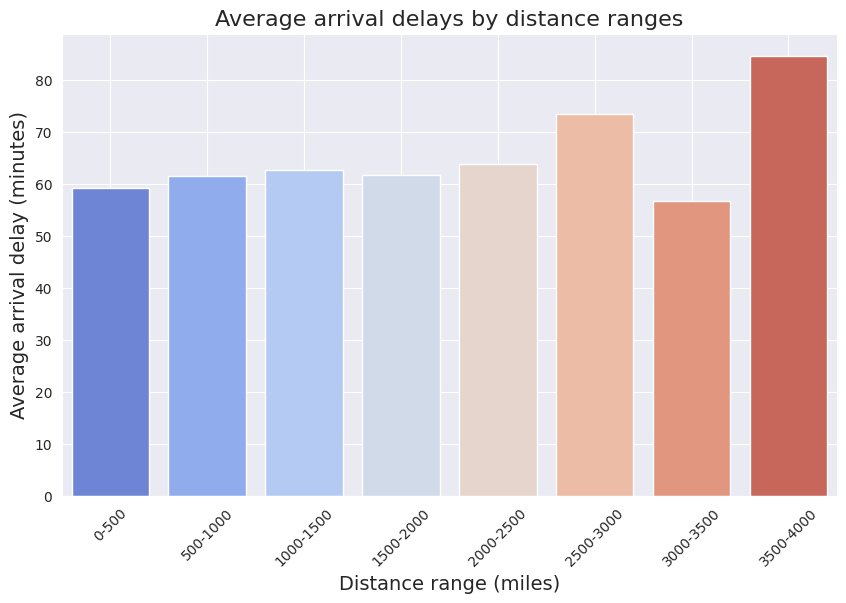

In [49]:
# create distance intervals
distance_bins = pd.cut(flight_delay['distance'], bins=[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000], labels=['0-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000', '3000-3500', '3500-4000'])

#add bins to the df
flight_delay['distance_bin'] = distance_bins

# calculate the mean arrival delays for each distance interval
distance_delay = flight_delay.groupby('distance_bin')['arr_delay'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='distance_bin', y='arr_delay', data=distance_delay, palette='coolwarm')
plt.title('Average arrival delays by distance ranges', fontsize=16)
plt.xlabel('Distance range (miles)', fontsize=14)
plt.ylabel('Average arrival delay (minutes)', fontsize=14)
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

This chart shows that average arrival delays increase as flight distances grow. Long-haul flights, especially in the range of 3500-4000 miles, exhibit the highest delays, averaging over 80 minutes. This may be attributed to multiple factors, such as a greater likelihood of encountering adverse weather conditions, congestion at international airports, or operational challenges on long flights, such as connections or refueling. In contrast, shorter flights (0 - 500 miles) have lower average delays, which could be related to more predictable operational times and reduced exposure to disruptions.

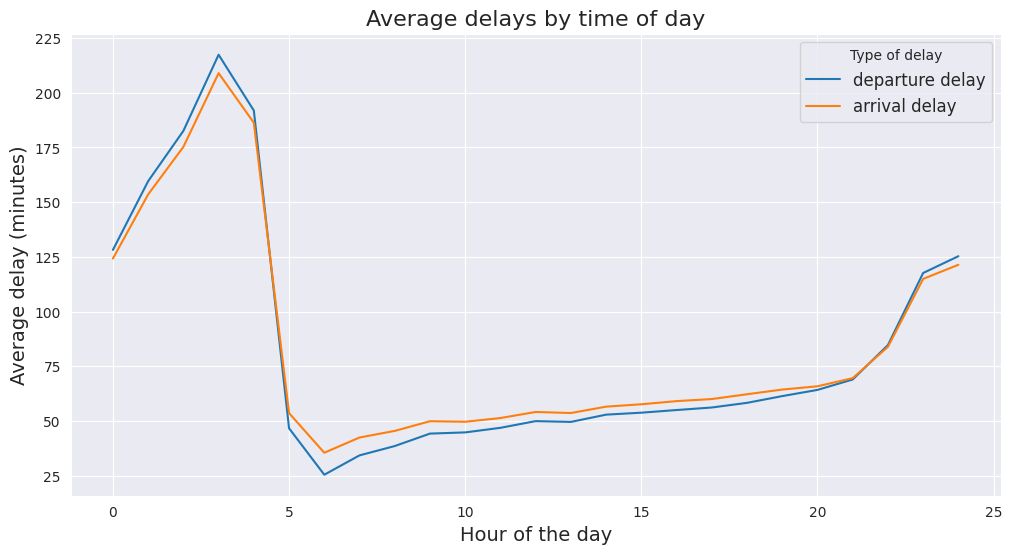

In [50]:
# visualization of delays by time of day
# extract hour from dep_time for this analysis
flight_delay['hour'] = flight_delay['dep_time'] // 100

# group by hour and calculate mean departure and arrival delays
delays_by_hour = flight_delay.groupby('hour')[['dep_delay', 'arr_delay']].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=delays_by_hour, x='hour', y='dep_delay', label='departure delay')
sns.lineplot(data=delays_by_hour, x='hour', y='arr_delay', label='arrival delay')

plt.title('Average delays by time of day', fontsize=16)
plt.xlabel('Hour of the day', fontsize=14)
plt.ylabel('Average delay (minutes)', fontsize=14)
plt.legend(title='Type of delay', fontsize=12)
plt.grid(True)
plt.show()

This visualization of average delays by time of day highlights some interesting trends, such as:

- high delays during late night/early morning hours: there is a sharp peak in delays around midnight and early morning hours, which could be due to reduced operations or spillover delays from the previous day's schedule.
- low delays during early morning (5AM - 6AM): delays drop significantly during early morning hours, probably because the day starts with a clean slate and flights are on schedule.
- gradual increase in delays: delays increase steadily throughout the day, probably due to compounding delays from earlier flights.
- late evening delays: there is another noticeable rise in delays during the late evening, likely due to cumulative delays or operational constraints.

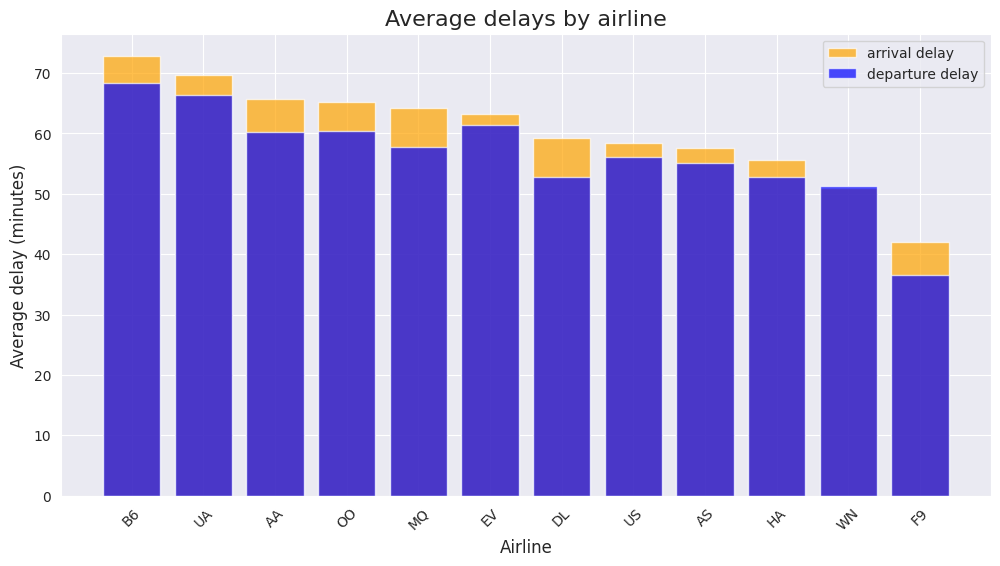

In [51]:
# comparation of delays between specific arlines
# group by airline and calculate average delay
avg_delay_by_airline = flight_delay.groupby('unique_carrier')[['arr_delay', 'dep_delay']].mean().reset_index()

plt.figure(figsize=(12, 6))
avg_delay_by_airline = avg_delay_by_airline.sort_values('arr_delay', ascending=False)
plt.bar(avg_delay_by_airline['unique_carrier'], avg_delay_by_airline['arr_delay'], alpha=0.7, label='arrival delay', color='orange')
plt.bar(avg_delay_by_airline['unique_carrier'], avg_delay_by_airline['dep_delay'], alpha=0.7, label='departure delay', color='blue')
plt.title('Average delays by airline', fontsize=16)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Average delay (minutes)', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.show()

The previous visualization shows that B6 (Jet Blue Airways) exhibits the highest delays among airlines, meanwhile UA (United Airlines) and AA (American Airlines) follow closely with relatively high delay averages. On the other hand, F9 (Frontier Airlines) has the lowest average delays, significantly less than other airlines.

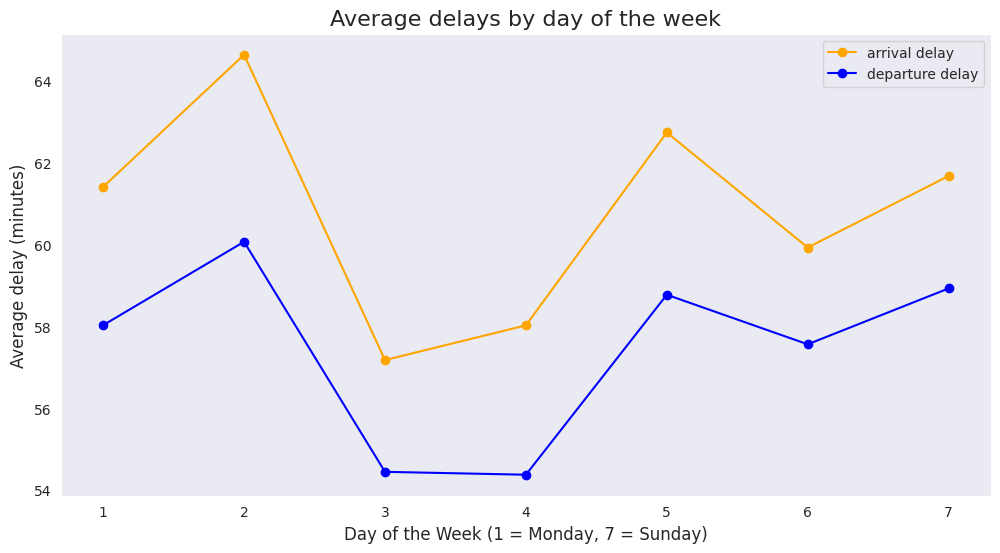

In [52]:
# impact of delays on different days of the week
# group by day_of_week and calculate average delay
avg_delay_by_day = flight_delay.groupby('day_of_week')[['arr_delay', 'dep_delay']].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(avg_delay_by_day['day_of_week'], avg_delay_by_day['arr_delay'], marker='o', label='arrival delay', color='orange')
plt.plot(avg_delay_by_day['day_of_week'], avg_delay_by_day['dep_delay'], marker='o', label='departure delay', color='blue')
plt.title('Average delays by day of the week', fontsize=16)
plt.xlabel('Day of the Week (1 = Monday, 7 = Sunday)', fontsize=12)
plt.ylabel('Average delay (minutes)', fontsize=12)
plt.legend()
plt.grid()
plt.show()

Tuesday (2) shows the highest average delays, particularly for arrival delays, meanwhile Wednesday (3) has the lowest average delays, for both departure and arrival delays. Delays tend to increase again toward the weekend, especially on Friday (5).

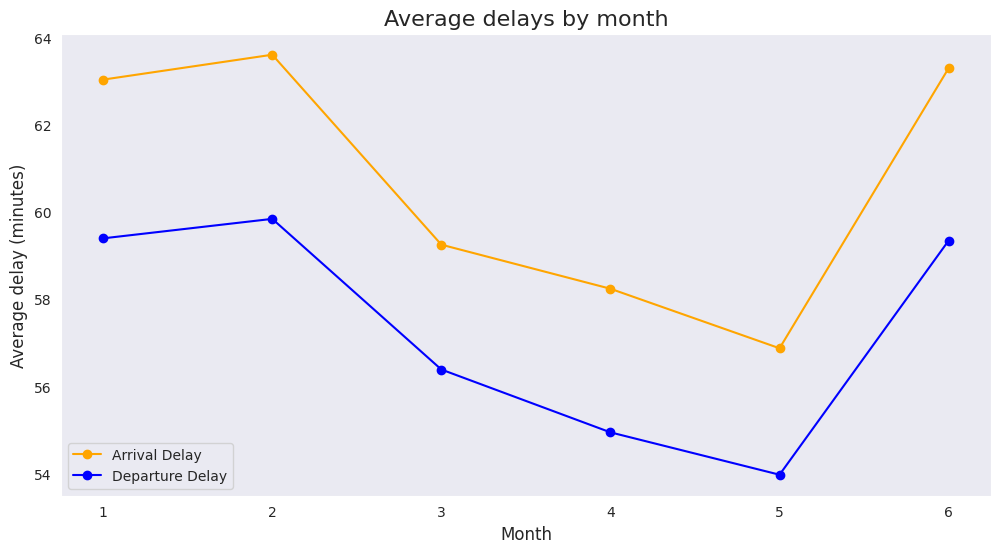

In [53]:
# impact of delays on different months
# analyze delays by month
avg_delay_by_month = flight_delay.groupby('month')[['arr_delay', 'dep_delay']].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(avg_delay_by_month['month'], avg_delay_by_month['arr_delay'], marker='o', label='Arrival Delay', color='orange')
plt.plot(avg_delay_by_month['month'], avg_delay_by_month['dep_delay'], marker='o', label='Departure Delay', color='blue')
plt.title('Average delays by month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average delay (minutes)', fontsize=12)
plt.legend()
plt.grid()
plt.show()

February and June (2 and 6) shows the highest average delays, particularly for arrival delays, meanwhile March, April and May (3, 4 anf 5) show a significant decline in delays, reaching their lowest points. June (6) shows the highest spike in arrival delays.

In [54]:
# categorical columns
categorical_cols = ['unique_carrier', 'origin', 'dest']

# OneHotEncoder without reducing cardinality
ohe = OneHotEncoder(sparse_output=True, handle_unknown='ignore')
encoded_data = ohe.fit_transform(flight_delay[categorical_cols])

# convert the encoded data to a df
encoded_df = pd.DataFrame.sparse.from_spmatrix(encoded_data, columns=ohe.get_feature_names_out(categorical_cols))

# combine the encoded columns with the original dataset (removing the original categorical columns)
flight_delay = pd.concat([flight_delay.drop(columns=categorical_cols), encoded_df], axis=1)

print("Encoded columns added to the dataset:")
print(encoded_df.columns.tolist())

Encoded columns added to the dataset:
['unique_carrier_AA', 'unique_carrier_AS', 'unique_carrier_B6', 'unique_carrier_DL', 'unique_carrier_EV', 'unique_carrier_F9', 'unique_carrier_HA', 'unique_carrier_MQ', 'unique_carrier_OO', 'unique_carrier_UA', 'unique_carrier_US', 'unique_carrier_WN', 'origin_ABE', 'origin_ABI', 'origin_ABQ', 'origin_ABY', 'origin_ACT', 'origin_ACV', 'origin_ACY', 'origin_ADK', 'origin_ADQ', 'origin_AEX', 'origin_AGS', 'origin_AKN', 'origin_ALB', 'origin_AMA', 'origin_ANC', 'origin_ASE', 'origin_ATL', 'origin_ATW', 'origin_AUS', 'origin_AVL', 'origin_AVP', 'origin_AZO', 'origin_BDL', 'origin_BET', 'origin_BFL', 'origin_BGR', 'origin_BHM', 'origin_BIL', 'origin_BIS', 'origin_BLI', 'origin_BMI', 'origin_BNA', 'origin_BOI', 'origin_BOS', 'origin_BQK', 'origin_BQN', 'origin_BRW', 'origin_BTM', 'origin_BTR', 'origin_BTV', 'origin_BUF', 'origin_BUR', 'origin_BWI', 'origin_BZN', 'origin_CAE', 'origin_CAK', 'origin_CDC', 'origin_CDV', 'origin_CEC', 'origin_CHA', 'origin_C

### Feature selection and data leakage prevention

To ensure the dataset is suitable for predictive modeling of flight delays, it is crucial to remove variables that introduce data leakage or are unavailable at the time of prediction. Variables such as arr_time (actual arrival time), actual_elapsed_time (actual flight duration), taxi_out (duration between the time the aircraft leaves the gate and the time it takes off)and taxi_in (time to reach the gate after landing) are dependent on post-flight events and, therefore, cannot be included as predictors.

By removing these columns, we ensure the integrity of the model and avoid using future information that could artificially inflate performance metrics.

In [55]:
print(flight_delay.shape)
flight_delay.head()

(484551, 590)


,year,month,day,day_of_week,dep_time,arr_time,crs_arr_time,actual_elapsed_time,crs_elapsed_time,air_time,...,dest_TYR,dest_TYS,dest_VLD,dest_VPS,dest_WRG,dest_WYS,dest_XNA,dest_YAK,dest_YKM,dest_YUM
0,2019.0,1.0,3.0,4.0,1829.0,1959.0,1925.0,90.0,90.0,77.0,...,0,0,0,0,0,0,0,0,0,0
1,2019.0,1.0,3.0,4.0,1937.0,2037.0,1940.0,240.0,250.0,230.0,...,0,0,0,0,0,0,0,0,0,0
2,2019.0,1.0,3.0,4.0,1644.0,1845.0,1725.0,121.0,135.0,107.0,...,0,0,0,0,0,0,0,0,0,0
3,2019.0,1.0,3.0,4.0,1452.0,1640.0,1625.0,228.0,240.0,213.0,...,0,0,0,0,0,0,0,0,0,0
4,2019.0,1.0,3.0,4.0,1323.0,1526.0,1510.0,123.0,135.0,110.0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
print("Columns:")
print(flight_delay.columns.tolist())

Columns:
['year', 'month', 'day', 'day_of_week', 'dep_time', 'arr_time', 'crs_arr_time', 'actual_elapsed_time', 'crs_elapsed_time', 'air_time', 'arr_delay', 'dep_delay', 'distance', 'taxi_in', 'taxi_out', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'pres', 'is_holiday', 'tomorrow_is_holiday', 'arr_delay_log', 'dep_delay_capped', 'distance_category', 'distance_bin', 'hour', 'unique_carrier_AA', 'unique_carrier_AS', 'unique_carrier_B6', 'unique_carrier_DL', 'unique_carrier_EV', 'unique_carrier_F9', 'unique_carrier_HA', 'unique_carrier_MQ', 'unique_carrier_OO', 'unique_carrier_UA', 'unique_carrier_US', 'unique_carrier_WN', 'origin_ABE', 'origin_ABI', 'origin_ABQ', 'origin_ABY', 'origin_ACT', 'origin_ACV', 'origin_ACY', 'origin_ADK', 'origin_ADQ', 'origin_AEX', 'origin_AGS', 'origin_AKN', 'origin_ALB', 'origin_AMA', 'origin_ANC', 'origin_ASE', 'origin_ATL', 'origin_ATW', 'origin_AUS', 'origin_AVL', 'origin_AVP', 'origin_AZO', 'origin_BDL', 'origin_BET', 'origin_BFL', 'origin_BG

In [57]:
print("Codified columns:", encoded_df.columns.tolist())

Codified columns: ['unique_carrier_AA', 'unique_carrier_AS', 'unique_carrier_B6', 'unique_carrier_DL', 'unique_carrier_EV', 'unique_carrier_F9', 'unique_carrier_HA', 'unique_carrier_MQ', 'unique_carrier_OO', 'unique_carrier_UA', 'unique_carrier_US', 'unique_carrier_WN', 'origin_ABE', 'origin_ABI', 'origin_ABQ', 'origin_ABY', 'origin_ACT', 'origin_ACV', 'origin_ACY', 'origin_ADK', 'origin_ADQ', 'origin_AEX', 'origin_AGS', 'origin_AKN', 'origin_ALB', 'origin_AMA', 'origin_ANC', 'origin_ASE', 'origin_ATL', 'origin_ATW', 'origin_AUS', 'origin_AVL', 'origin_AVP', 'origin_AZO', 'origin_BDL', 'origin_BET', 'origin_BFL', 'origin_BGR', 'origin_BHM', 'origin_BIL', 'origin_BIS', 'origin_BLI', 'origin_BMI', 'origin_BNA', 'origin_BOI', 'origin_BOS', 'origin_BQK', 'origin_BQN', 'origin_BRW', 'origin_BTM', 'origin_BTR', 'origin_BTV', 'origin_BUF', 'origin_BUR', 'origin_BWI', 'origin_BZN', 'origin_CAE', 'origin_CAK', 'origin_CDC', 'origin_CDV', 'origin_CEC', 'origin_CHA', 'origin_CHO', 'origin_CHS', '

In [58]:
# create seasonal variables
flight_delay['is_weekend'] = flight_delay['day_of_week'].apply(lambda x: 1 if x in [6, 7] else 0)
flight_delay['season'] = flight_delay['month'].apply(lambda x: 'winter' if x in [12, 1, 2] else
                                                     ('spring' if x in [3, 4, 5] else
                                                      ('summer' if x in [6, 7, 8] else 'autumn')))

# convert the season column into categorical variables (OneHotEncoding)
flight_delay = pd.get_dummies(flight_delay, columns=['season'], drop_first=True)

print("Columns created for seasonality:", flight_delay.columns)

Columns created for seasonality: Index(['year', 'month', 'day', 'day_of_week', 'dep_time', 'arr_time',
       'crs_arr_time', 'actual_elapsed_time', 'crs_elapsed_time', 'air_time',
       ...
       'dest_WRG', 'dest_WYS', 'dest_XNA', 'dest_YAK', 'dest_YKM', 'dest_YUM',
       'is_weekend', 'season_spring', 'season_summer', 'season_winter'],
      dtype='object', length=594)


In [59]:
# remove rows with missing values
flight_delay = flight_delay.dropna(subset=['crs_arr_time'])

# convert crs_arr_time to a 4 digit format
flight_delay['crs_arr_time'] = flight_delay['crs_arr_time'].apply(lambda x: f"{int(x):04d}")

# extract the scheduled arrival hour in 24h format
flight_delay['crs_arr_hour'] = flight_delay['crs_arr_time'].str[:2].astype(int)

# create time ranges
def categorize_hour(hour):
    if 0 <= hour < 6:
        return 'night'
    elif 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    elif 18 <= hour < 24:
        return 'evening'
    else:
        return None

flight_delay['crs_arr_time_category'] = flight_delay['crs_arr_hour'].apply(categorize_hour)

# convert the categories into dummy variables (include all categories)
flight_delay = pd.get_dummies(flight_delay, columns=['crs_arr_time_category'], drop_first=False)

print("New columns created:", [col for col in flight_delay.columns if 'crs_arr_time_category' in col or 'crs_arr_hour' in col])

New columns created: ['crs_arr_hour', 'crs_arr_time_category_afternoon', 'crs_arr_time_category_evening', 'crs_arr_time_category_morning', 'crs_arr_time_category_night']


In [63]:
# columns to drop (non-predictive or redundant based on the correlation matrix)
columns_to_drop = ['day', 'month', 'day_of_week', 'actual_elapsed_time', 'distance', 'air_time', 'arr_time', 'taxi_in', 'taxi_out', 'tmin', 'tmax', 'wdir', 'pres', 'dep_time', 'year', 'distance_bin', 'dep_time', 'crs_arr_time', 'crs_arr_hour']

flight_delay.drop(columns=columns_to_drop, inplace=True)
print(f"Columns dropped for being non-predictive or redundant: {columns_to_drop}")

Columns dropped for being non-predictive or redundant: ['day', 'month', 'day_of_week', 'actual_elapsed_time', 'distance', 'air_time', 'arr_time', 'taxi_in', 'taxi_out', 'tmin', 'tmax', 'wdir', 'pres', 'dep_time', 'year', 'distance_bin', 'dep_time', 'crs_arr_time', 'crs_arr_hour']


In [64]:
# identify boolean columns to convert to 1 and 0
dummy_columns = [col for col in flight_delay.columns if 'crs_arr_time_category' in col or 'season' in col]

# convert all identified columns to integers (1 and 0)
flight_delay[dummy_columns] = flight_delay[dummy_columns].astype(int)

print(flight_delay[dummy_columns].head())

   season_spring  season_summer  season_winter  \
0              0              0              1   
1              0              0              1   
2              0              0              1   
3              0              0              1   
4              0              0              1   

   crs_arr_time_category_afternoon  crs_arr_time_category_evening  \
0                                0                              1   
1                                0                              1   
2                                1                              0   
3                                1                              0   
4                                1                              0   

   crs_arr_time_category_morning  crs_arr_time_category_night  
0                              0                            0  
1                              0                            0  
2                              0                            0  
3                           

In [65]:
print(flight_delay.shape)
flight_delay.head()

(484549, 581)


,crs_elapsed_time,arr_delay,dep_delay,tavg,prcp,snow,wspd,is_holiday,tomorrow_is_holiday,arr_delay_log,...,dest_YKM,dest_YUM,is_weekend,season_spring,season_summer,season_winter,crs_arr_time_category_afternoon,crs_arr_time_category_evening,crs_arr_time_category_morning,crs_arr_time_category_night
0,90.0,34.0,34.0,0.5,0.0,0.0,11.9,0.0,0.0,3.555348,...,0,0,0,0,0,1,0,1,0,0
1,250.0,57.0,67.0,0.5,0.0,0.0,11.9,0.0,0.0,4.060443,...,0,0,0,0,0,1,0,1,0,0
2,135.0,80.0,94.0,0.5,0.0,0.0,11.9,0.0,0.0,4.394449,...,0,0,0,0,0,1,1,0,0,0
3,240.0,15.0,27.0,0.5,0.0,0.0,11.9,0.0,0.0,2.772589,...,0,0,0,0,0,1,1,0,0,0
4,135.0,16.0,28.0,0.5,0.0,0.0,11.9,0.0,0.0,2.833213,...,0,0,0,0,0,1,1,0,0,0


In [66]:
print("Columns:")
print(flight_delay.columns.tolist())

Columns:
['crs_elapsed_time', 'arr_delay', 'dep_delay', 'tavg', 'prcp', 'snow', 'wspd', 'is_holiday', 'tomorrow_is_holiday', 'arr_delay_log', 'dep_delay_capped', 'distance_category', 'hour', 'unique_carrier_AA', 'unique_carrier_AS', 'unique_carrier_B6', 'unique_carrier_DL', 'unique_carrier_EV', 'unique_carrier_F9', 'unique_carrier_HA', 'unique_carrier_MQ', 'unique_carrier_OO', 'unique_carrier_UA', 'unique_carrier_US', 'unique_carrier_WN', 'origin_ABE', 'origin_ABI', 'origin_ABQ', 'origin_ABY', 'origin_ACT', 'origin_ACV', 'origin_ACY', 'origin_ADK', 'origin_ADQ', 'origin_AEX', 'origin_AGS', 'origin_AKN', 'origin_ALB', 'origin_AMA', 'origin_ANC', 'origin_ASE', 'origin_ATL', 'origin_ATW', 'origin_AUS', 'origin_AVL', 'origin_AVP', 'origin_AZO', 'origin_BDL', 'origin_BET', 'origin_BFL', 'origin_BGR', 'origin_BHM', 'origin_BIL', 'origin_BIS', 'origin_BLI', 'origin_BMI', 'origin_BNA', 'origin_BOI', 'origin_BOS', 'origin_BQK', 'origin_BQN', 'origin_BRW', 'origin_BTM', 'origin_BTR', 'origin_BTV